# Imports

In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# The Dataset

In [357]:
msn02 = pd.read_csv("data/msn_02_fuel_leak_signals_preprocessed.csv", delimiter=';')

In [358]:
msn02.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623580 entries, 0 to 623579
Data columns (total 111 columns):
 #    Column                                Non-Null Count   Dtype  
---   ------                                --------------   -----  
 0    UTC_TIME                              623580 non-null  object 
 1    MSN                                   623580 non-null  object 
 2    Flight                                623580 non-null  object 
 3    ENGINE_RUNNING_1                      623580 non-null  bool   
 4    ENGINE_RUNNING_2                      623580 non-null  bool   
 5    ENGINE_RUNNING_3                      623580 non-null  bool   
 6    ENGINE_RUNNING_4                      623580 non-null  bool   
 7    FLIGHT_PHASE_COUNT                    560658 non-null  float64
 8    FUEL_FLOW_1                           514937 non-null  float64
 9    FUEL_FLOW_2                           516594 non-null  float64
 10   FUEL_FLOW_3                           516599 non-null 

In [359]:
# Setting index as datetime
msn02['UTC_TIME'] = pd.to_datetime(msn02['UTC_TIME'])
msn02 = msn02.set_index("UTC_TIME")

In [360]:
msn02 = msn02.sort_index()

In [361]:
# Dropping Duplicates
msn02 = msn02.drop_duplicates()

In [362]:
msn02.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 610106 entries, 2010-10-26 12:56:13 to 2017-01-23 20:28:35
Data columns (total 110 columns):
 #    Column                                Non-Null Count   Dtype  
---   ------                                --------------   -----  
 0    MSN                                   610106 non-null  object 
 1    Flight                                610106 non-null  object 
 2    ENGINE_RUNNING_1                      610106 non-null  bool   
 3    ENGINE_RUNNING_2                      610106 non-null  bool   
 4    ENGINE_RUNNING_3                      610106 non-null  bool   
 5    ENGINE_RUNNING_4                      610106 non-null  bool   
 6    FLIGHT_PHASE_COUNT                    547185 non-null  float64
 7    FUEL_FLOW_1                           503789 non-null  float64
 8    FUEL_FLOW_2                           504961 non-null  float64
 9    FUEL_FLOW_3                           504966 non-null  float64
 10   FUEL_FLOW_4         

In [363]:
# Keeping only relevant columns

# Same as those available in the other MSNs except for added VALUE_FUEL_QTYCCx
columns = ['MSN', 
           'Flight',
           'FLIGHT_PHASE_COUNT','FUEL_USED_1','FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4', 
           'FW_GEO_ALTITUDE',
           'VALUE_FOB', 
           #'VALUE_FUEL_QTY_CC1', 'VALUE_FUEL_QTY_CC2', 'VALUE_FUEL_QTY_CC3', 'VALUE_FUEL_QTY_CC4', 
           'VALUE_FUEL_QTY_CT', 
           'VALUE_FUEL_QTY_FT1', 'VALUE_FUEL_QTY_FT2', 'VALUE_FUEL_QTY_FT3', 'VALUE_FUEL_QTY_FT4', 
           'VALUE_FUEL_QTY_LXT', 'VALUE_FUEL_QTY_RXT',
           'LEAK_DETECTION_LEAK_FLOW', 'STATUS_FUEL_LEAK_DETECTED_VALID'
           ]

df = msn02[columns]

In [364]:
# Dropping all rows with nulls
df = df.dropna(subset=columns)

In [365]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503467 entries, 2010-10-26 12:56:15 to 2017-01-23 20:28:33
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   MSN                              503467 non-null  object 
 1   Flight                           503467 non-null  object 
 2   FLIGHT_PHASE_COUNT               503467 non-null  float64
 3   FUEL_USED_1                      503467 non-null  float64
 4   FUEL_USED_2                      503467 non-null  float64
 5   FUEL_USED_3                      503467 non-null  float64
 6   FUEL_USED_4                      503467 non-null  float64
 7   FW_GEO_ALTITUDE                  503467 non-null  float64
 8   VALUE_FOB                        503467 non-null  float64
 9   VALUE_FUEL_QTY_CT                503467 non-null  float64
 10  VALUE_FUEL_QTY_FT1               503467 non-null  float64
 11  VALUE_FUEL_QTY_FT2             

# The two possible target variables

### `STATUS_FUEL_LEAK_DETECTED_VALID`

In [366]:
df['STATUS_FUEL_LEAK_DETECTED_VALID'].value_counts()

STATUS_FUEL_LEAK_DETECTED_VALID
1.0    503384
0.0        83
Name: count, dtype: int64

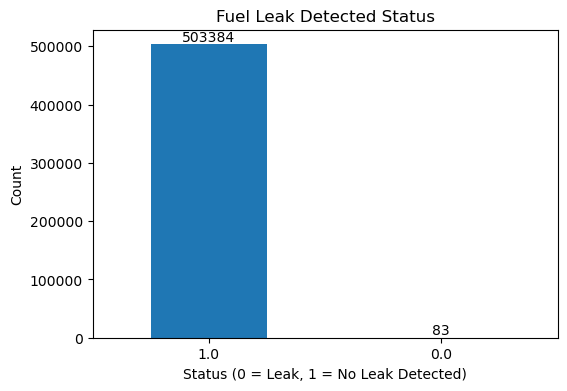

In [367]:
# Assuming df is your DataFrame
status_counts = df['STATUS_FUEL_LEAK_DETECTED_VALID'].value_counts()

# Create the bar chart
plt.figure(figsize=(6, 4))
bars = status_counts.plot(kind='bar')

# Add labels and title
plt.title('Fuel Leak Detected Status')
plt.xlabel('Status (0 = Leak, 1 = No Leak Detected)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Annotate the bars with the numbers
for i, value in enumerate(status_counts):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.show()


### `LEAK_DETECTION_LEAK_FLOW`

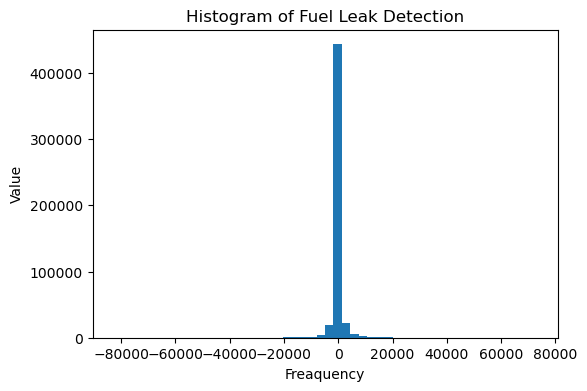

In [368]:
plt.figure(figsize=(6, 4))
plt.hist(df['LEAK_DETECTION_LEAK_FLOW'], bins=50)
plt.xlabel("Freaquency")
plt.ylabel("Value")
plt.title("Histogram of Fuel Leak Detection")
plt.show()

In [369]:
df['LEAK_DETECTION_LEAK_FLOW'].describe()

count    503467.000000
mean        -63.237622
std        2619.548138
min      -82781.590000
25%        -162.348150
50%           0.000000
75%         142.510750
max       73028.340000
Name: LEAK_DETECTION_LEAK_FLOW, dtype: float64

In [370]:
df['LEAK_DETECTION_LEAK_FLOW'].value_counts()

LEAK_DETECTION_LEAK_FLOW
0.00000        82859
326.19430      12589
125.41090       5094
10302.26000       43
74.28348           8
               ...  
8483.42500         1
7880.47500         1
7456.26100         1
6863.49300         1
31.75000           1
Name: count, Length: 372998, dtype: int64

#### Setting possible threshold

In [371]:
threshold = 2500 # Change as needed
df['LEAK_FLOW_FLAG'] = (df['LEAK_DETECTION_LEAK_FLOW'] > threshold).astype(int)

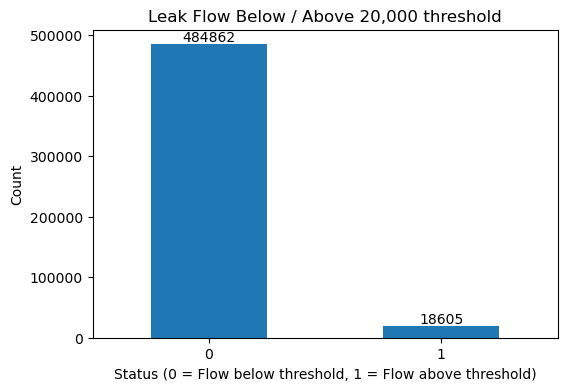

In [ ]:
status_counts = df['LEAK_FLOW_FLAG'].value_counts()

# Create the bar chart
plt.figure(figsize=(6, 4))
bars = status_counts.plot(kind='bar')

# Add labels and title
plt.title('Leak Flow Below / Above 2,500 threshold')
plt.xlabel('Status (0 = Flow below threshold, 1 = Flow above threshold)')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Annotate the bars with the numbers
for i, value in enumerate(status_counts):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.show()


# Feature Enginneering

### Fuel Discprepancy Equation 1

In [373]:
# Identify Different Flights within the same flight number
# ========================================================

# Identify when a new flight starts (FLIGHT_PHASE_COUNT resets within each Flight)
df['NEW_FLIGHT'] = df.groupby('Flight')['FLIGHT_PHASE_COUNT'].diff().lt(0)

# Assign a unique flight instance number per Flight
df['FLIGHT_INSTANCE'] = df.groupby('Flight')['NEW_FLIGHT'].cumsum()

# New column to identify unique flights
df['FLIGHT_ID'] = df['Flight'].astype(str) + "_" + df['FLIGHT_INSTANCE'].astype(str)

In [374]:
# Filter out only fro flight phase 8 - Cruise
df = df[df["FLIGHT_PHASE_COUNT"]==8.0]

In [375]:
# Calculating Fuel Discrepancy
# ============================

# Sort by time
df = df.sort_index()

# Find the initial fuel value for each flight instance
df['1START_FOB'] = df.groupby('FLIGHT_ID')['VALUE_FOB'].transform('first')

# Calculate the total fuel used
df['TOTAL_FUEL_USED'] = df['FUEL_USED_1'] + df['FUEL_USED_2'] + df['FUEL_USED_3'] + df['FUEL_USED_4']

# Calcuate expected fuel on board
df['1EXPECTED_FOB'] = df['1START_FOB'] - df['TOTAL_FUEL_USED']

# Find Fuel Discrepancy between expected value and current value
df["1FOB_DIFFERENCE"] = (df['1EXPECTED_FOB'] - df['VALUE_FOB']).abs()

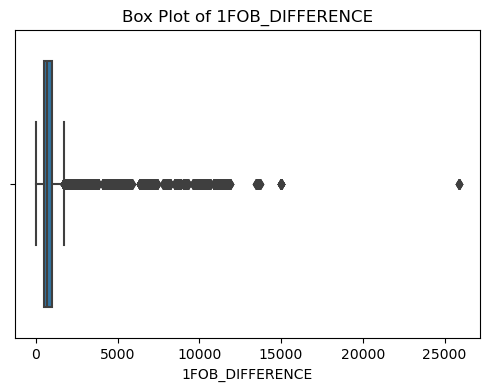

In [376]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['1FOB_DIFFERENCE'])
plt.title('Box Plot of 1FOB_DIFFERENCE')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


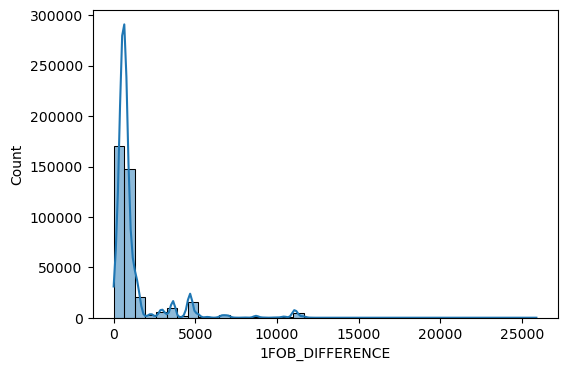

In [377]:
plt.figure(figsize=(6, 4))
sns.histplot(df["1FOB_DIFFERENCE"], bins=40, kde=True)
plt.show()

In [378]:
df['1FOB_DIFFERENCE'].describe()

count    383560.000000
mean       1225.510783
std        1793.125501
min           0.017000
25%         490.156750
50%         689.743000
75%         975.440000
max       25868.452000
Name: 1FOB_DIFFERENCE, dtype: float64

#### FOB_DIFFERENCE DENSITY GRAPHS

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

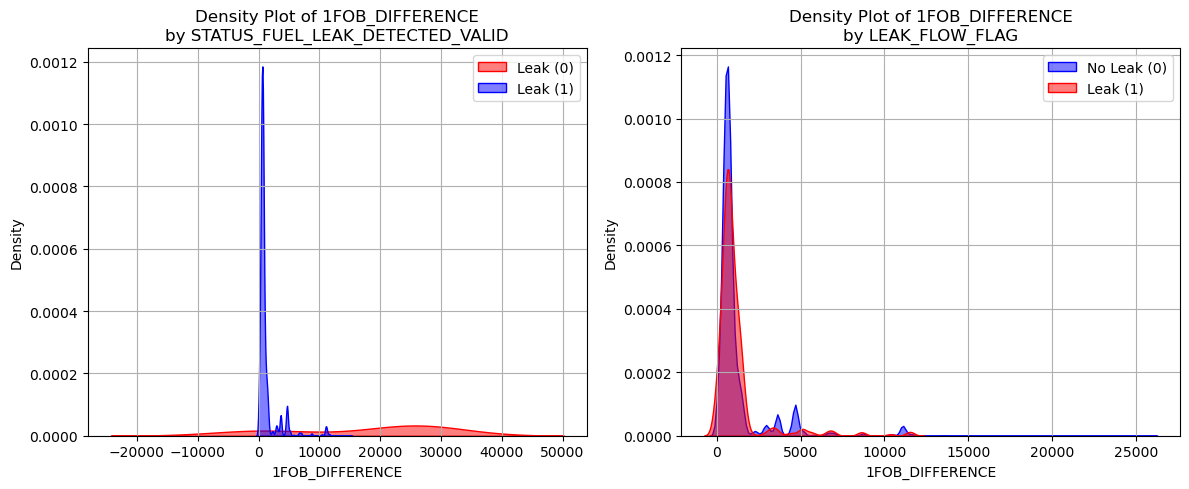

In [379]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# With STATUS_FUEL_LEAK_DETECTED_VALID
sns.kdeplot(df[df['STATUS_FUEL_LEAK_DETECTED_VALID'] == 0]['1FOB_DIFFERENCE'], 
            label="Leak (0)", fill=True, alpha=0.5, ax=axes[0], color='red')
sns.kdeplot(df[df['STATUS_FUEL_LEAK_DETECTED_VALID'] == 1]['1FOB_DIFFERENCE'], 
            label="Leak (1)", fill=True, alpha=0.5, ax=axes[0], color='blue')

# Labels and title
axes[0].set_xlabel("1FOB_DIFFERENCE")
axes[0].set_ylabel("Density")
axes[0].set_title("Density Plot of 1FOB_DIFFERENCE\nby STATUS_FUEL_LEAK_DETECTED_VALID")
axes[0].legend()
axes[0].grid(True)

# With LEAK_FLOW_FLAG
sns.kdeplot(df[df['LEAK_FLOW_FLAG'] == 0]['1FOB_DIFFERENCE'], 
            label="No Leak (0)", fill=True, alpha=0.5, ax=axes[1], color='blue')
sns.kdeplot(df[df['LEAK_FLOW_FLAG'] == 1]['1FOB_DIFFERENCE'], 
            label="Leak (1)", fill=True, alpha=0.5, ax=axes[1], color='red')

# Labels and title
axes[1].set_xlabel("1FOB_DIFFERENCE")
axes[1].set_ylabel("Density")
axes[1].set_title("Density Plot of 1FOB_DIFFERENCE\nby LEAK_FLOW_FLAG")
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Fuel Discprepancy Equation 2

In [380]:
# Start amount of fuel on board
df['START_FOB'] = df.groupby('Flight')['VALUE_FOB'].transform('first')

# Total amount of fuel in tanks
df['FUEL_IN_TANKS'] = df['VALUE_FUEL_QTY_CT'] + df['VALUE_FUEL_QTY_FT1'] + df['VALUE_FUEL_QTY_FT2'] + df['VALUE_FUEL_QTY_FT3'] + df['VALUE_FUEL_QTY_FT4'] + df['VALUE_FUEL_QTY_LXT'] + df['VALUE_FUEL_QTY_RXT']

# Find the total amount of fuel used
df['TOTAL_FUEL_USED'] = df['FUEL_USED_1'] + df['FUEL_USED_2'] + df['FUEL_USED_3'] + df['FUEL_USED_4']

# Find expected amount of fuel on board (Starting amount of fuel - total fuel used at that point)
df['EXPECTED_FOB'] = df['FUEL_IN_TANKS'] - df['TOTAL_FUEL_USED']

# Finding the discrepancy of what is on board and what is expected to be on board
df["FOB_DIFFERENCE"] = (df['EXPECTED_FOB'] - df['VALUE_FOB']).abs()

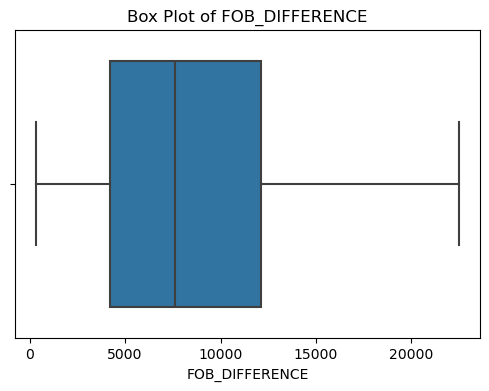

In [381]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['FOB_DIFFERENCE'])
plt.title('Box Plot of FOB_DIFFERENCE')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='FOB_DIFFERENCE', ylabel='Count'>

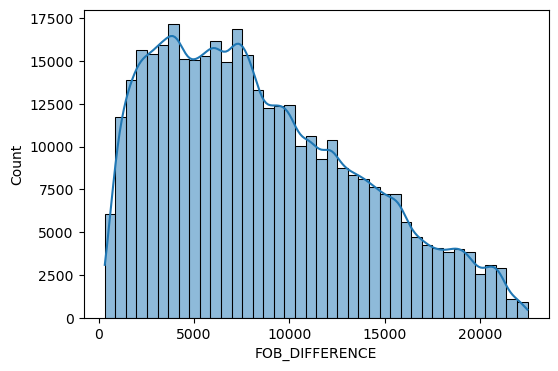

In [382]:
plt.figure(figsize=(6,4))
sns.histplot(df["FOB_DIFFERENCE"], bins=40, kde=True)

In [383]:
df["FOB_DIFFERENCE"].describe()

count    383560.00000
mean       8490.52246
std        5197.16678
min         326.65798
25%        4207.19325
50%        7617.31000
75%       12113.84725
max       22479.55200
Name: FOB_DIFFERENCE, dtype: float64

#### FOB_DIFFERENCE DENSITY GRAPHS

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

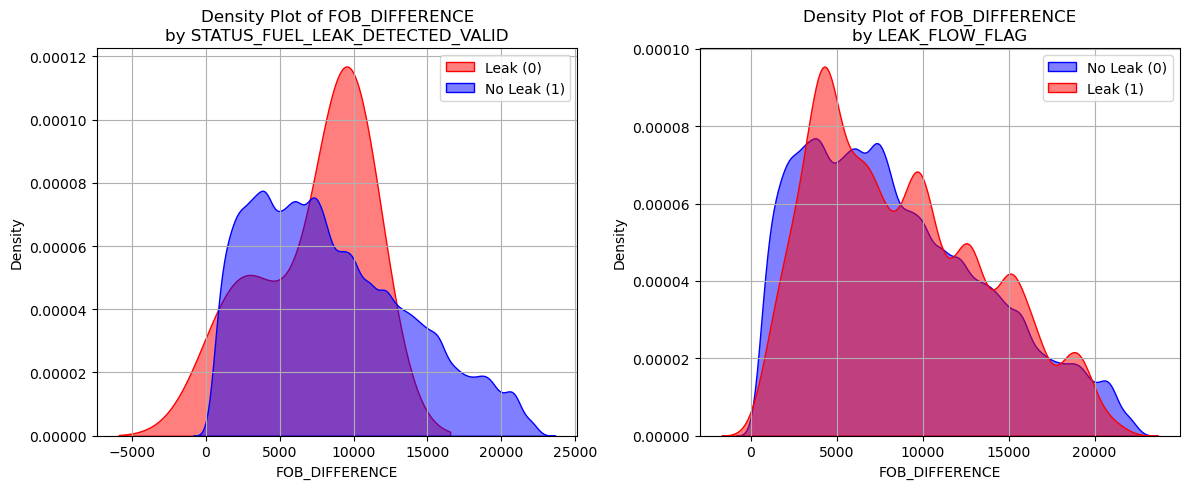

In [384]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# With STATUS_FUEL_LEAK_DETECTED_VALID
sns.kdeplot(df[df['STATUS_FUEL_LEAK_DETECTED_VALID'] == 0]['FOB_DIFFERENCE'], 
            label="Leak (0)", fill=True, alpha=0.5, ax=axes[0], color='red')
sns.kdeplot(df[df['STATUS_FUEL_LEAK_DETECTED_VALID'] == 1]['FOB_DIFFERENCE'], 
            label="No Leak (1)", fill=True, alpha=0.5, ax=axes[0], color='blue')

# Labels and title
axes[0].set_xlabel("FOB_DIFFERENCE")
axes[0].set_ylabel("Density")
axes[0].set_title("Density Plot of FOB_DIFFERENCE\nby STATUS_FUEL_LEAK_DETECTED_VALID")
axes[0].legend()
axes[0].grid(True)

# With LEAK_FLOW_FLAG
sns.kdeplot(df[df['LEAK_FLOW_FLAG'] == 0]['FOB_DIFFERENCE'], 
            label="No Leak (0)", fill=True, alpha=0.5, ax=axes[1], color='blue')
sns.kdeplot(df[df['LEAK_FLOW_FLAG'] == 1]['FOB_DIFFERENCE'], 
            label="Leak (1)", fill=True, alpha=0.5, ax=axes[1], color='red')

# Labels and title
axes[1].set_xlabel("FOB_DIFFERENCE")
axes[1].set_ylabel("Density")
axes[1].set_title("Density Plot of FOB_DIFFERENCE\nby LEAK_FLOW_FLAG")
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Discrepancy between given `VALUE_FOB` and our own calculations of fuel on board

In [385]:
df['CALC_VALUE_FOB_DIFF'] =  df['FUEL_IN_TANKS'] - df['VALUE_FOB']

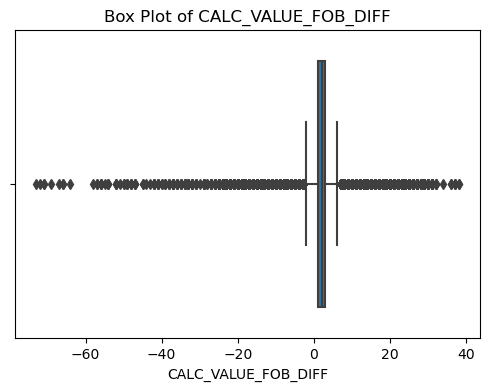

In [386]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['CALC_VALUE_FOB_DIFF'])
plt.title('Box Plot of CALC_VALUE_FOB_DIFF')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


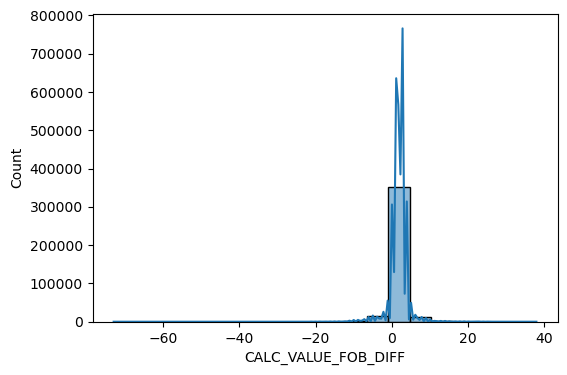

In [387]:
plt.figure(figsize=(6,4))
sns.histplot(df["CALC_VALUE_FOB_DIFF"], bins=20, kde=True)
plt.show()

In [388]:
df["CALC_VALUE_FOB_DIFF"].describe()


count    383560.000000
mean          1.892424
std           2.358250
min         -73.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          38.000000
Name: CALC_VALUE_FOB_DIFF, dtype: float64

#### CALC_VALUE_FOB_DIFF DENSITY GRAPHS

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

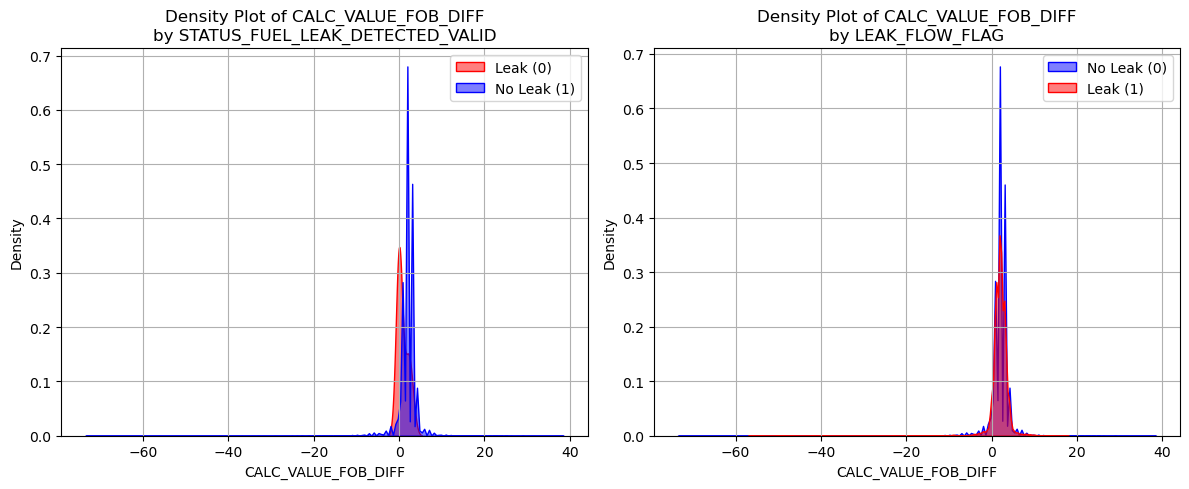

In [389]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# With STATUS_FUEL_LEAK_DETECTED_VALID
sns.kdeplot(df[df['STATUS_FUEL_LEAK_DETECTED_VALID'] == 0]['CALC_VALUE_FOB_DIFF'], 
            label="Leak (0)", fill=True, alpha=0.5, ax=axes[0], color='red')
sns.kdeplot(df[df['STATUS_FUEL_LEAK_DETECTED_VALID'] == 1]['CALC_VALUE_FOB_DIFF'], 
            label="No Leak (1)", fill=True, alpha=0.5, ax=axes[0], color='blue')

# Labels and title
axes[0].set_xlabel("CALC_VALUE_FOB_DIFF")
axes[0].set_ylabel("Density")
axes[0].set_title("Density Plot of CALC_VALUE_FOB_DIFF\nby STATUS_FUEL_LEAK_DETECTED_VALID")
axes[0].legend()
axes[0].grid(True)

# With LEAK_FLOW_FLAG
sns.kdeplot(df[df['LEAK_FLOW_FLAG'] == 0]['CALC_VALUE_FOB_DIFF'], 
            label="No Leak (0)", fill=True, alpha=0.5, ax=axes[1], color='blue')
sns.kdeplot(df[df['LEAK_FLOW_FLAG'] == 1]['CALC_VALUE_FOB_DIFF'], 
            label="Leak (1)", fill=True, alpha=0.5, ax=axes[1], color='red')

# Labels and title
axes[1].set_xlabel("CALC_VALUE_FOB_DIFF")
axes[1].set_ylabel("Density")
axes[1].set_title("Density Plot of CALC_VALUE_FOB_DIFF\nby LEAK_FLOW_FLAG")
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Calculating Fuel imbalance between left and right wings

In [390]:
# Total Fuel in Left and Right Wing
df['TOTAL_FUEL_LW'] = (df['VALUE_FUEL_QTY_LXT'] + df['VALUE_FUEL_QTY_FT1'] + df['VALUE_FUEL_QTY_FT2'])
df['TOTAL_FUEL_RW'] = (df['VALUE_FUEL_QTY_RXT'] + df['VALUE_FUEL_QTY_FT3'] + df['VALUE_FUEL_QTY_FT4'])

# Fuel Difference
df['LW_RW_DIFF'] = (df['TOTAL_FUEL_LW'] - df['TOTAL_FUEL_RW']).abs()

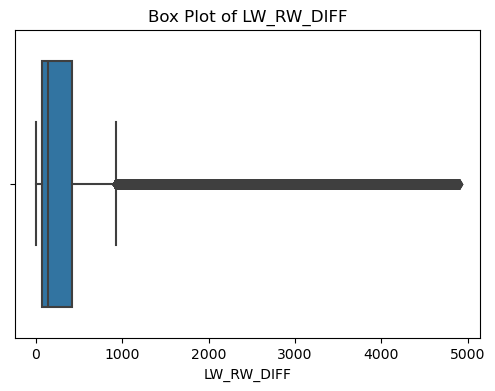

In [391]:
plt.figure(figsize=(6,4))  
sns.boxplot(x=df['LW_RW_DIFF'])
plt.title('Box Plot of LW_RW_DIFF')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


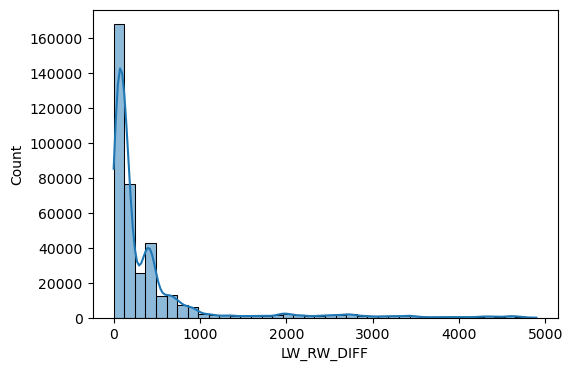

In [392]:
plt.figure(figsize=(6,4))
sns.histplot(df["LW_RW_DIFF"], bins=40, kde=True)
plt.show()

In [393]:
df["LW_RW_DIFF"].describe()

count    383560.000000
mean        401.334349
std         716.852748
min           0.000000
25%          67.000000
50%         144.000000
75%         412.000000
max        4895.000000
Name: LW_RW_DIFF, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

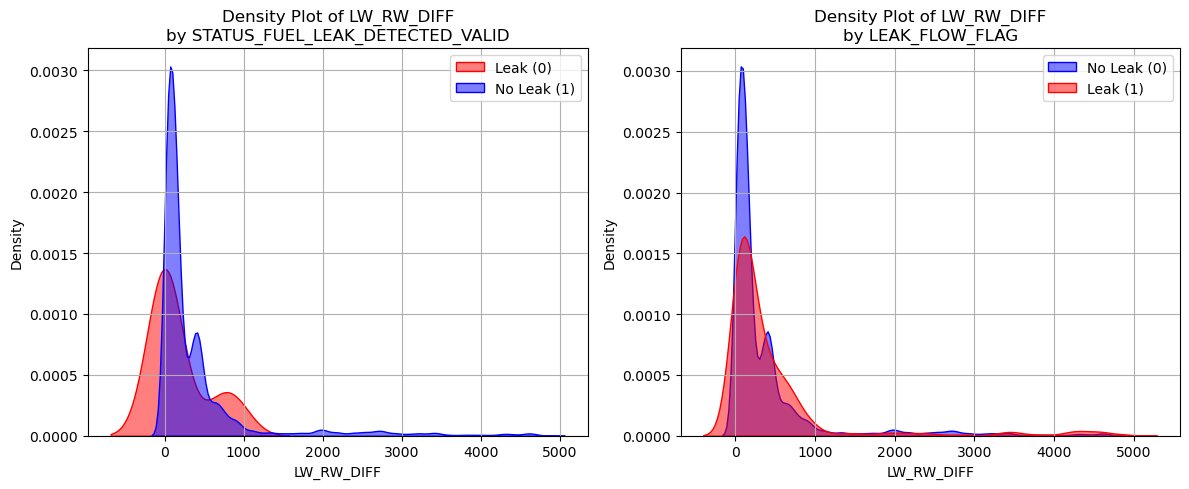

In [394]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# With STATUS_FUEL_LEAK_DETECTED_VALID
sns.kdeplot(df[df['STATUS_FUEL_LEAK_DETECTED_VALID'] == 0]['LW_RW_DIFF'], 
            label="Leak (0)", fill=True, alpha=0.5, ax=axes[0], color='red')
sns.kdeplot(df[df['STATUS_FUEL_LEAK_DETECTED_VALID'] == 1]['LW_RW_DIFF'], 
            label="No Leak (1)", fill=True, alpha=0.5, ax=axes[0], color='blue')

# Labels and title
axes[0].set_xlabel("LW_RW_DIFF")
axes[0].set_ylabel("Density")
axes[0].set_title("Density Plot of LW_RW_DIFF\nby STATUS_FUEL_LEAK_DETECTED_VALID")
axes[0].legend()
axes[0].grid(True)

# With LEAK_FLOW_FLAG
sns.kdeplot(df[df['LEAK_FLOW_FLAG'] == 0]['LW_RW_DIFF'], 
            label="No Leak (0)", fill=True, alpha=0.5, ax=axes[1], color='blue')
sns.kdeplot(df[df['LEAK_FLOW_FLAG'] == 1]['LW_RW_DIFF'], 
            label="Leak (1)", fill=True, alpha=0.5, ax=axes[1], color='red')

# Labels and title
axes[1].set_xlabel("LW_RW_DIFF")
axes[1].set_ylabel("Density")
axes[1].set_title("Density Plot of LW_RW_DIFF\nby LEAK_FLOW_FLAG")
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


# EDA

### `FW_GEO_ALTITUDE`

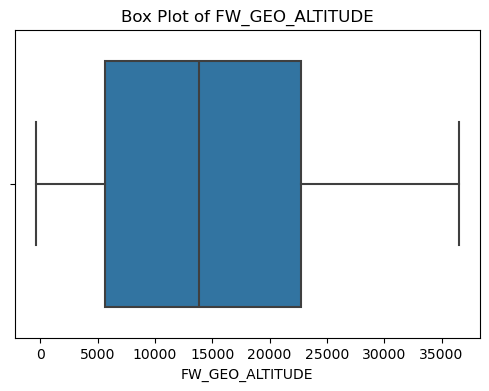

In [395]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['FW_GEO_ALTITUDE'])
plt.title('Box Plot of FW_GEO_ALTITUDE')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


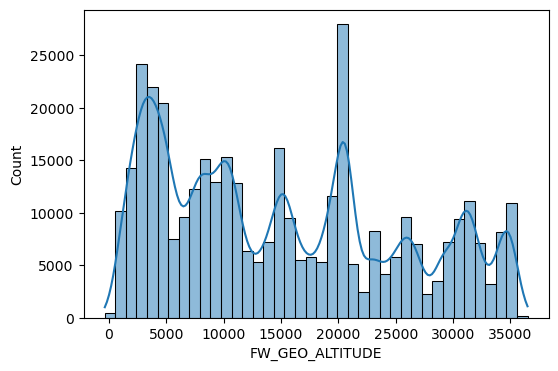

In [396]:
plt.figure(figsize=(6,4))
sns.histplot(df["FW_GEO_ALTITUDE"], bins=40, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

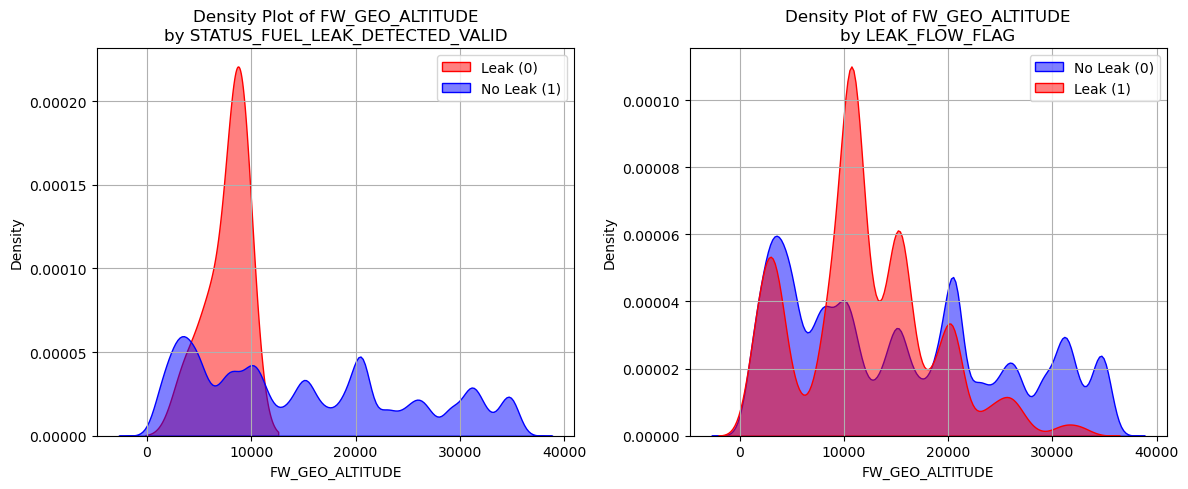

In [397]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# With STATUS_FUEL_LEAK_DETECTED_VALID
sns.kdeplot(df[df['STATUS_FUEL_LEAK_DETECTED_VALID'] == 0]['FW_GEO_ALTITUDE'], 
            label="Leak (0)", fill=True, alpha=0.5, ax=axes[0], color='red')
sns.kdeplot(df[df['STATUS_FUEL_LEAK_DETECTED_VALID'] == 1]['FW_GEO_ALTITUDE'], 
            label="No Leak (1)", fill=True, alpha=0.5, ax=axes[0], color='blue')

# Labels and title
axes[0].set_xlabel("FW_GEO_ALTITUDE")
axes[0].set_ylabel("Density")
axes[0].set_title("Density Plot of FW_GEO_ALTITUDE\nby STATUS_FUEL_LEAK_DETECTED_VALID")
axes[0].legend()
axes[0].grid(True)

# With LEAK_FLOW_FLAG
sns.kdeplot(df[df['LEAK_FLOW_FLAG'] == 0]['FW_GEO_ALTITUDE'], 
            label="No Leak (0)", fill=True, alpha=0.5, ax=axes[1], color='blue')
sns.kdeplot(df[df['LEAK_FLOW_FLAG'] == 1]['FW_GEO_ALTITUDE'], 
            label="Leak (1)", fill=True, alpha=0.5, ax=axes[1], color='red')

# Labels and title
axes[1].set_xlabel("FW_GEO_ALTITUDE")
axes[1].set_ylabel("Density")
axes[1].set_title("Density Plot of FW_GEO_ALTITUDE\nby LEAK_FLOW_FLAG")
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### `TOTAL_FUEL_USED`

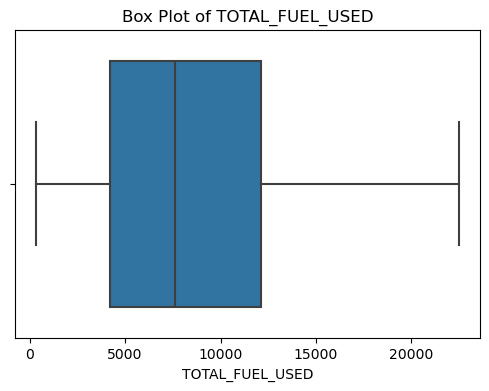

In [398]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['TOTAL_FUEL_USED'])
plt.title('Box Plot of TOTAL_FUEL_USED')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


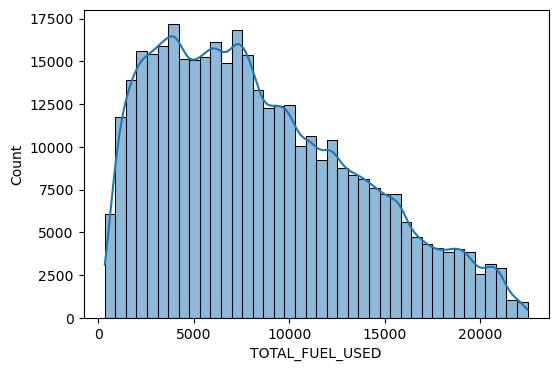

In [399]:
plt.figure(figsize=(6,4))
sns.histplot(df["TOTAL_FUEL_USED"], bins=40, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

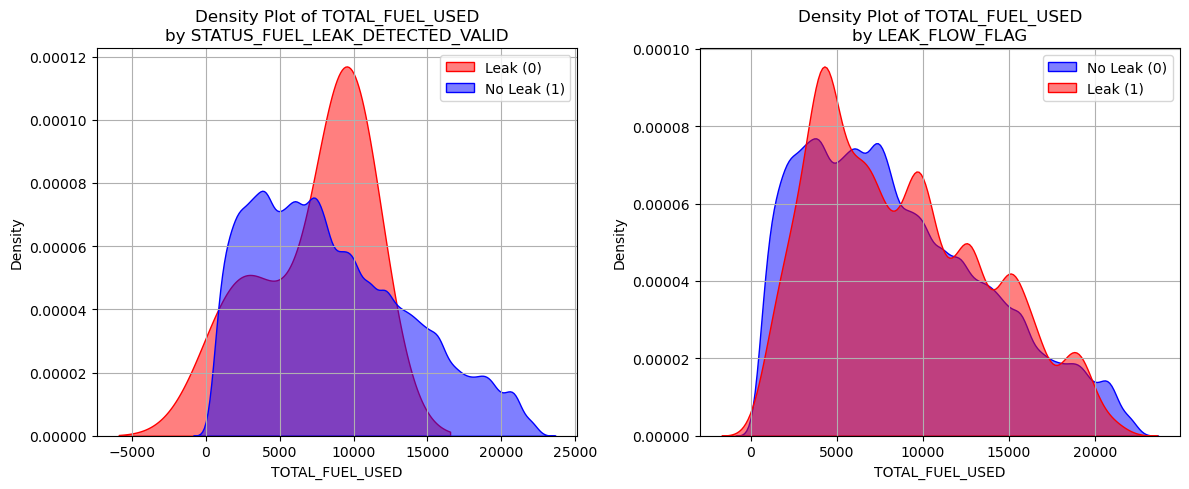

In [400]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# With STATUS_FUEL_LEAK_DETECTED_VALID
sns.kdeplot(df[df['STATUS_FUEL_LEAK_DETECTED_VALID'] == 0]['TOTAL_FUEL_USED'], 
            label="Leak (0)", fill=True, alpha=0.5, ax=axes[0], color='red')
sns.kdeplot(df[df['STATUS_FUEL_LEAK_DETECTED_VALID'] == 1]['TOTAL_FUEL_USED'], 
            label="No Leak (1)", fill=True, alpha=0.5, ax=axes[0], color='blue')

# Labels and title
axes[0].set_xlabel("TOTAL_FUEL_USED")
axes[0].set_ylabel("Density")
axes[0].set_title("Density Plot of TOTAL_FUEL_USED\nby STATUS_FUEL_LEAK_DETECTED_VALID")
axes[0].legend()
axes[0].grid(True)

# With LEAK_FLOW_FLAG
sns.kdeplot(df[df['LEAK_FLOW_FLAG'] == 0]['TOTAL_FUEL_USED'], 
            label="No Leak (0)", fill=True, alpha=0.5, ax=axes[1], color='blue')
sns.kdeplot(df[df['LEAK_FLOW_FLAG'] == 1]['TOTAL_FUEL_USED'], 
            label="Leak (1)", fill=True, alpha=0.5, ax=axes[1], color='red')

# Labels and title
axes[1].set_xlabel("TOTAL_FUEL_USED")
axes[1].set_ylabel("Density")
axes[1].set_title("Density Plot of TOTAL_FUEL_USED\nby LEAK_FLOW_FLAG")
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### `VALUE_FOB`

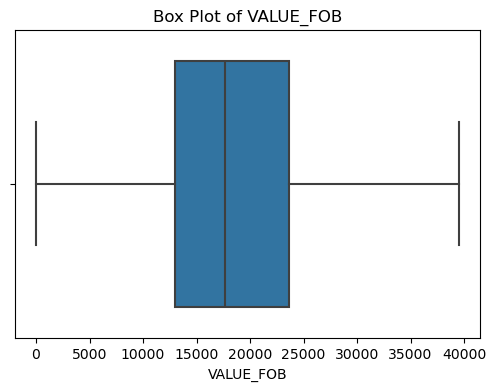

In [401]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['VALUE_FOB'])
plt.title('Box Plot of VALUE_FOB')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


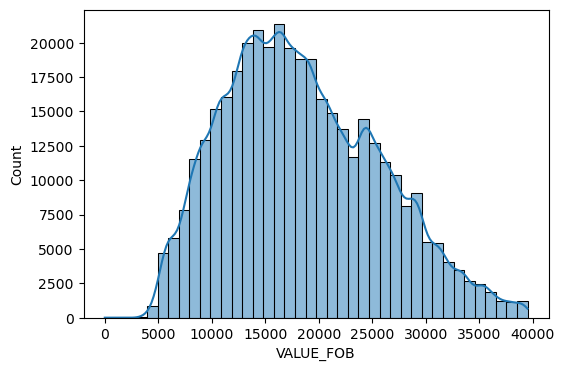

In [402]:
plt.figure(figsize=(6,4))
sns.histplot(df["VALUE_FOB"], bins=40, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

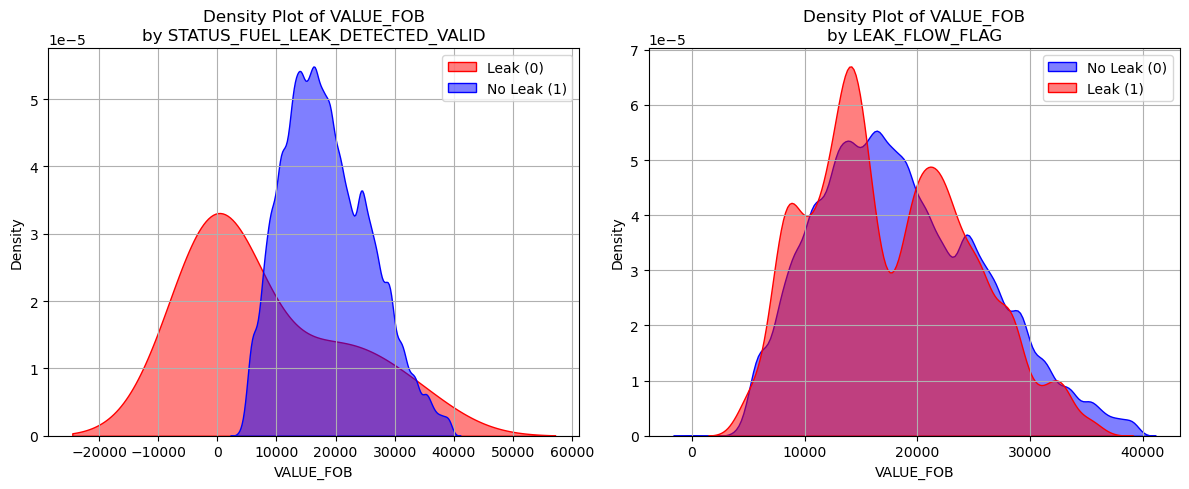

In [403]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# With STATUS_FUEL_LEAK_DETECTED_VALID
sns.kdeplot(df[df['STATUS_FUEL_LEAK_DETECTED_VALID'] == 0]['VALUE_FOB'], 
            label="Leak (0)", fill=True, alpha=0.5, ax=axes[0], color='red')
sns.kdeplot(df[df['STATUS_FUEL_LEAK_DETECTED_VALID'] == 1]['VALUE_FOB'], 
            label="No Leak (1)", fill=True, alpha=0.5, ax=axes[0], color='blue')

# Labels and title
axes[0].set_xlabel("VALUE_FOB")
axes[0].set_ylabel("Density")
axes[0].set_title("Density Plot of VALUE_FOB\nby STATUS_FUEL_LEAK_DETECTED_VALID")
axes[0].legend()
axes[0].grid(True)

# With LEAK_FLOW_FLAG
sns.kdeplot(df[df['LEAK_FLOW_FLAG'] == 0]['VALUE_FOB'], 
            label="No Leak (0)", fill=True, alpha=0.5, ax=axes[1], color='blue')
sns.kdeplot(df[df['LEAK_FLOW_FLAG'] == 1]['VALUE_FOB'], 
            label="Leak (1)", fill=True, alpha=0.5, ax=axes[1], color='red')

# Labels and title
axes[1].set_xlabel("VALUE_FOB")
axes[1].set_ylabel("Density")
axes[1].set_title("Density Plot of VALUE_FOB\nby LEAK_FLOW_FLAG")
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### `VALUE_FOB` vs `EXPECTED_FOB`

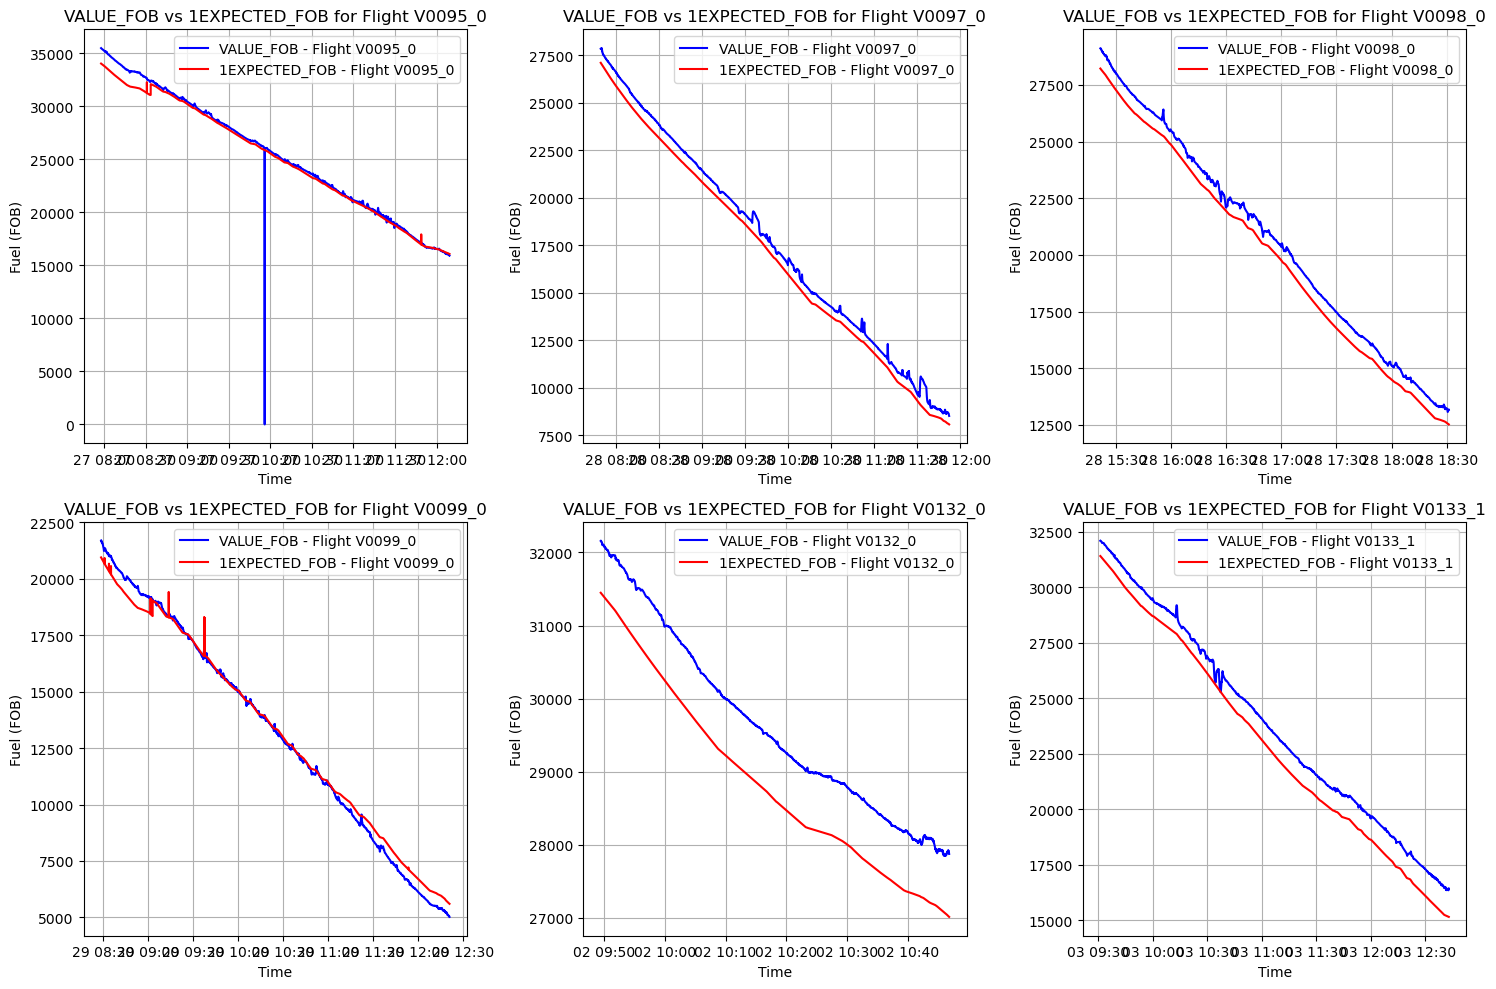

In [404]:
# WITH EQUATION 1
flights_to_plot = df['FLIGHT_ID'].unique()[:7]

# Initialize counter
counter = 0

# Set up the number of rows and columns for subplots
rows = 2  # you can change this based on the number of flights
cols = 3  # you can change this based on the number of flights

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (if it's 2D)
axes = axes.flatten()

# For each unique flight
for idx, flight in enumerate(flights_to_plot[1:]):  # skipping the first flight
    # Filter data for that flight
    flight_data = df[df['FLIGHT_ID'] == flight]
    
    # Select the current subplot axis
    ax = axes[idx]
    
    # Plot the actual fuel on board (VALUE_FOB) vs expected fuel on board (EXPECTED_FOB)
    ax.plot(flight_data.index, flight_data['VALUE_FOB'], label=f'VALUE_FOB - Flight {flight}', color='blue')
    ax.plot(flight_data.index, flight_data['1EXPECTED_FOB'], label=f'1EXPECTED_FOB - Flight {flight}', color='red')
    
    # Set the title and labels for the subplot
    ax.set_title(f'VALUE_FOB vs 1EXPECTED_FOB for Flight {flight}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Fuel (FOB)')
    
    # Add legend
    ax.legend()
    
    # Show grid
    ax.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

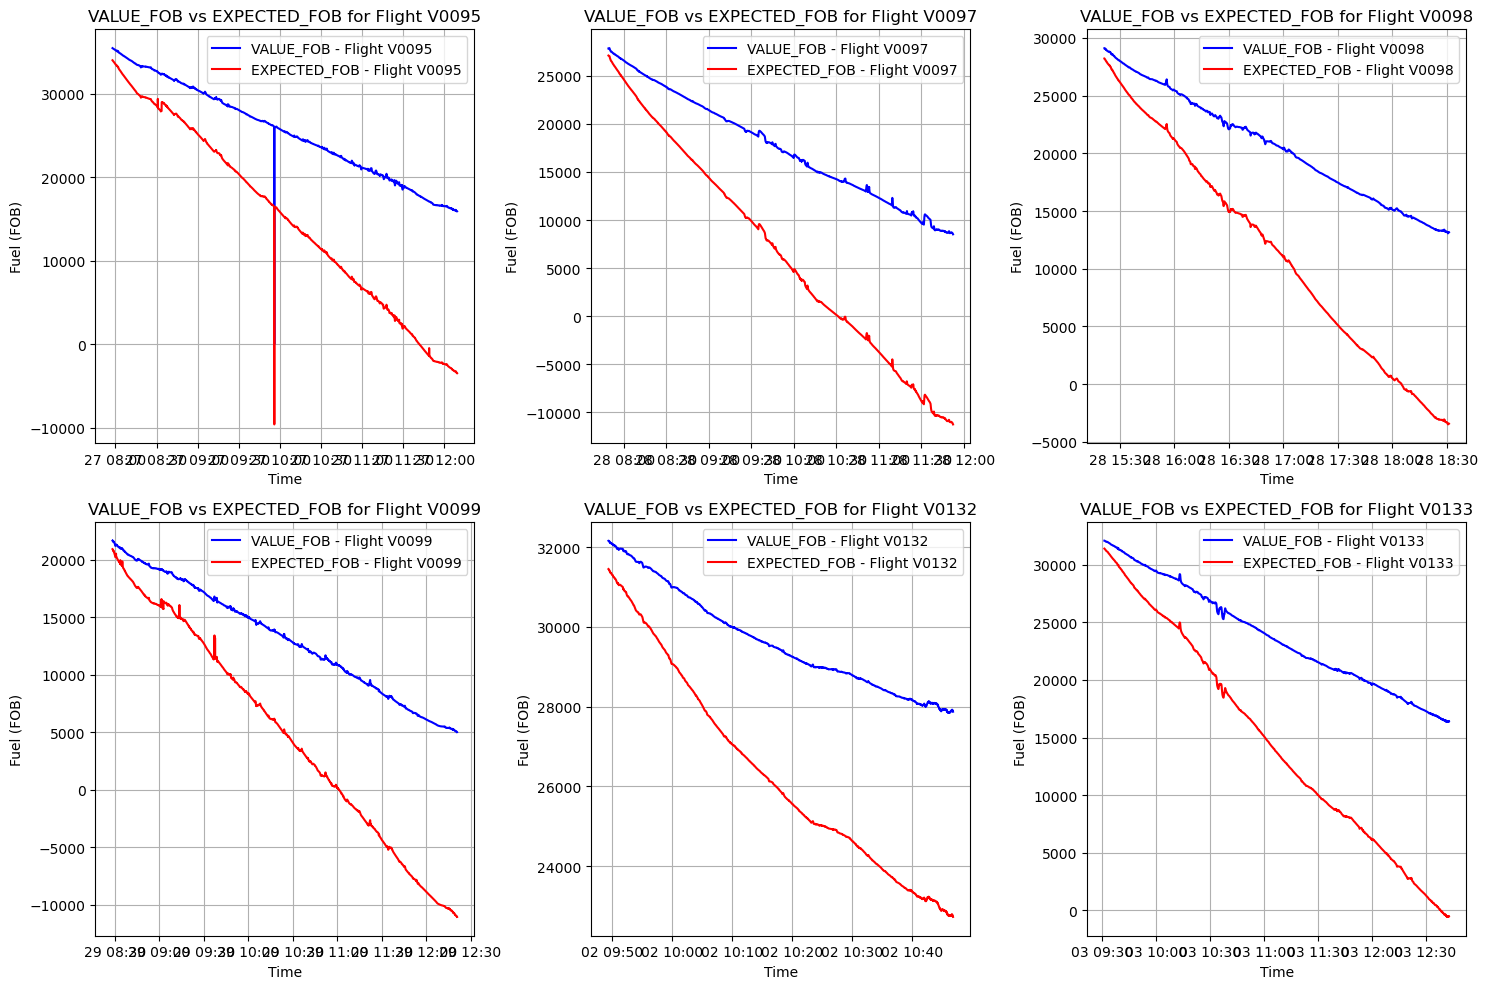

In [405]:
# WITH EQUATION 2
flights_to_plot = df['Flight'].unique()[:7]

# Initialize counter
counter = 0

# Set up the number of rows and columns for subplots
rows = 2  # you can change this based on the number of flights
cols = 3  # you can change this based on the number of flights

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (if it's 2D)
axes = axes.flatten()

# For each unique flight
for idx, flight in enumerate(flights_to_plot[1:]):  # skipping the first flight
    # Filter data for that flight
    flight_data = df[df['Flight'] == flight]
    
    # Select the current subplot axis
    ax = axes[idx]
    
    # Plot the actual fuel on board (VALUE_FOB) vs expected fuel on board (EXPECTED_FOB)
    ax.plot(flight_data.index, flight_data['VALUE_FOB'], label=f'VALUE_FOB - Flight {flight}', color='blue')
    ax.plot(flight_data.index, flight_data['EXPECTED_FOB'], label=f'EXPECTED_FOB - Flight {flight}', color='red')
    
    # Set the title and labels for the subplot
    ax.set_title(f'VALUE_FOB vs EXPECTED_FOB for Flight {flight}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Fuel (FOB)')
    
    # Add legend
    ax.legend()
    
    # Show grid
    ax.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

### `START FOB` vs `TOTAL_FUEL_USED` + `VALUE_FOB`
Should be equal

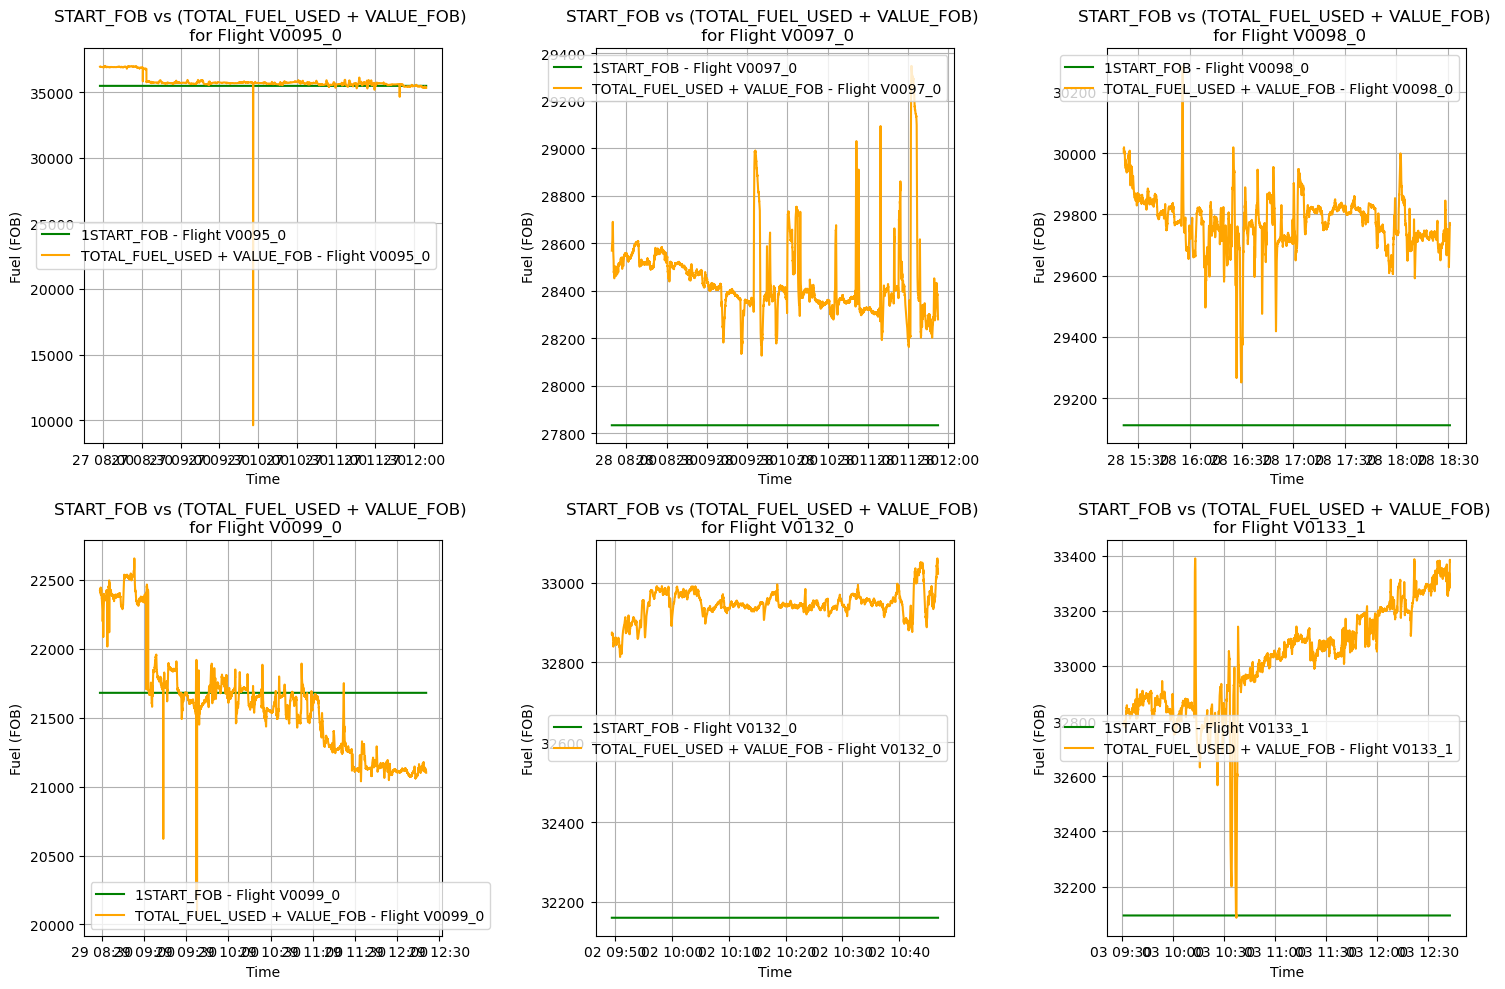

In [406]:
# Equation 1
flights_to_plot = df['FLIGHT_ID'].unique()[:7]

# Initialize counter
counter = 0

# Set up the number of rows and columns for subplots
rows = 2 
cols = 3  

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (if it's 2D)
axes = axes.flatten()

# For each unique flight
for idx, flight in enumerate(flights_to_plot[1:]):  # Skipping the first flight for the plot
    if counter == 7:
        break

    # Filter data for that flight
    flight_data = df[df['FLIGHT_ID'] == flight]
    
    # Select the current subplot axis
    ax = axes[idx]
    
    # Plot the START_FOB
    ax.plot(flight_data.index, flight_data['1START_FOB'], label=f'1START_FOB - Flight {flight}', color='green')
    
    # Calculate TOTAL_FUEL_USED + VALUE_FOB for the entire flight
    total_fuel_used_plus_fob = flight_data['TOTAL_FUEL_USED'] + flight_data['VALUE_FOB']
    
    # Plot the TOTAL_FUEL_USED + VALUE_FOB
    ax.plot(flight_data.index, total_fuel_used_plus_fob, label=f'TOTAL_FUEL_USED + VALUE_FOB - Flight {flight}', color='orange')
    
    # Set the title and labels for the subplot
    ax.set_title(f'START_FOB vs (TOTAL_FUEL_USED + VALUE_FOB) \n for Flight {flight}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Fuel (FOB)')
    
    # Add legend
    ax.legend()
    
    # Show grid
    ax.grid(True)

    # Increment counter
    counter += 1

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

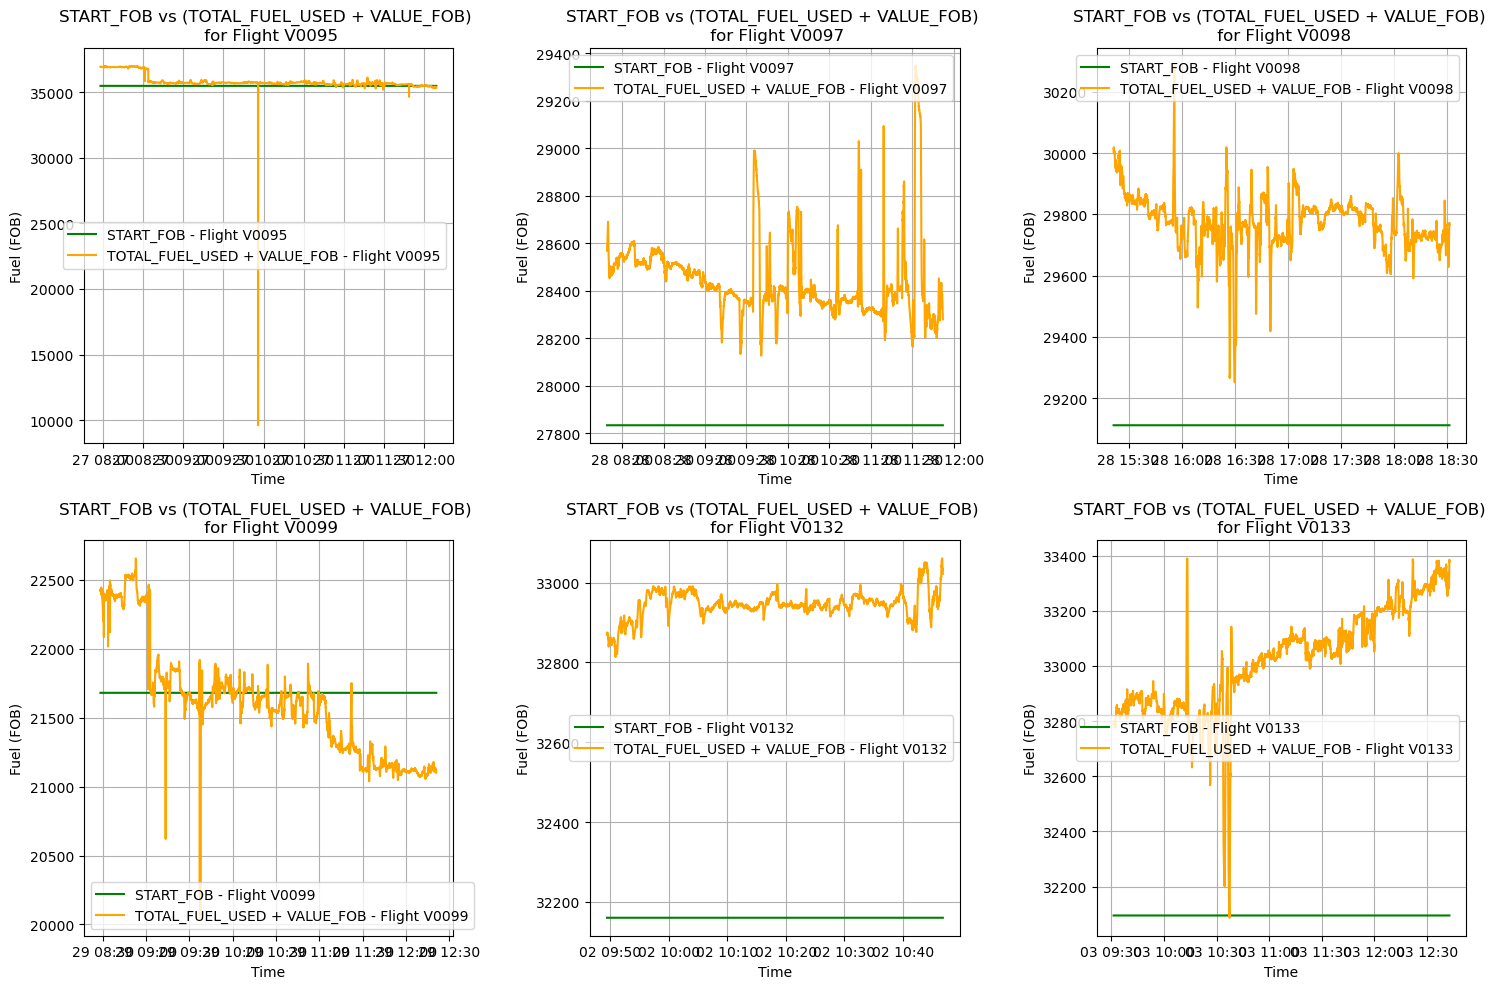

In [407]:
# EQUATION 2
flights_to_plot = df['Flight'].unique()[:7]

# Initialize counter
counter = 0

# Set up the number of rows and columns for subplots
rows = 2 
cols = 3  

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (if it's 2D)
axes = axes.flatten()

# For each unique flight
for idx, flight in enumerate(flights_to_plot[1:]):  # Skipping the first flight for the plot
    if counter == 7:
        break

    # Filter data for that flight
    flight_data = df[df['Flight'] == flight]
    
    # Select the current subplot axis
    ax = axes[idx]
    
    # Plot the START_FOB
    ax.plot(flight_data.index, flight_data['START_FOB'], label=f'START_FOB - Flight {flight}', color='green')
    
    # Calculate TOTAL_FUEL_USED + VALUE_FOB for the entire flight
    total_fuel_used_plus_fob = flight_data['TOTAL_FUEL_USED'] + flight_data['VALUE_FOB']
    
    # Plot the TOTAL_FUEL_USED + VALUE_FOB
    ax.plot(flight_data.index, total_fuel_used_plus_fob, label=f'TOTAL_FUEL_USED + VALUE_FOB - Flight {flight}', color='orange')
    
    # Set the title and labels for the subplot
    ax.set_title(f'START_FOB vs (TOTAL_FUEL_USED + VALUE_FOB) \n for Flight {flight}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Fuel (FOB)')
    
    # Add legend
    ax.legend()
    
    # Show grid
    ax.grid(True)

    # Increment counter
    counter += 1

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

### Correlation Matrix

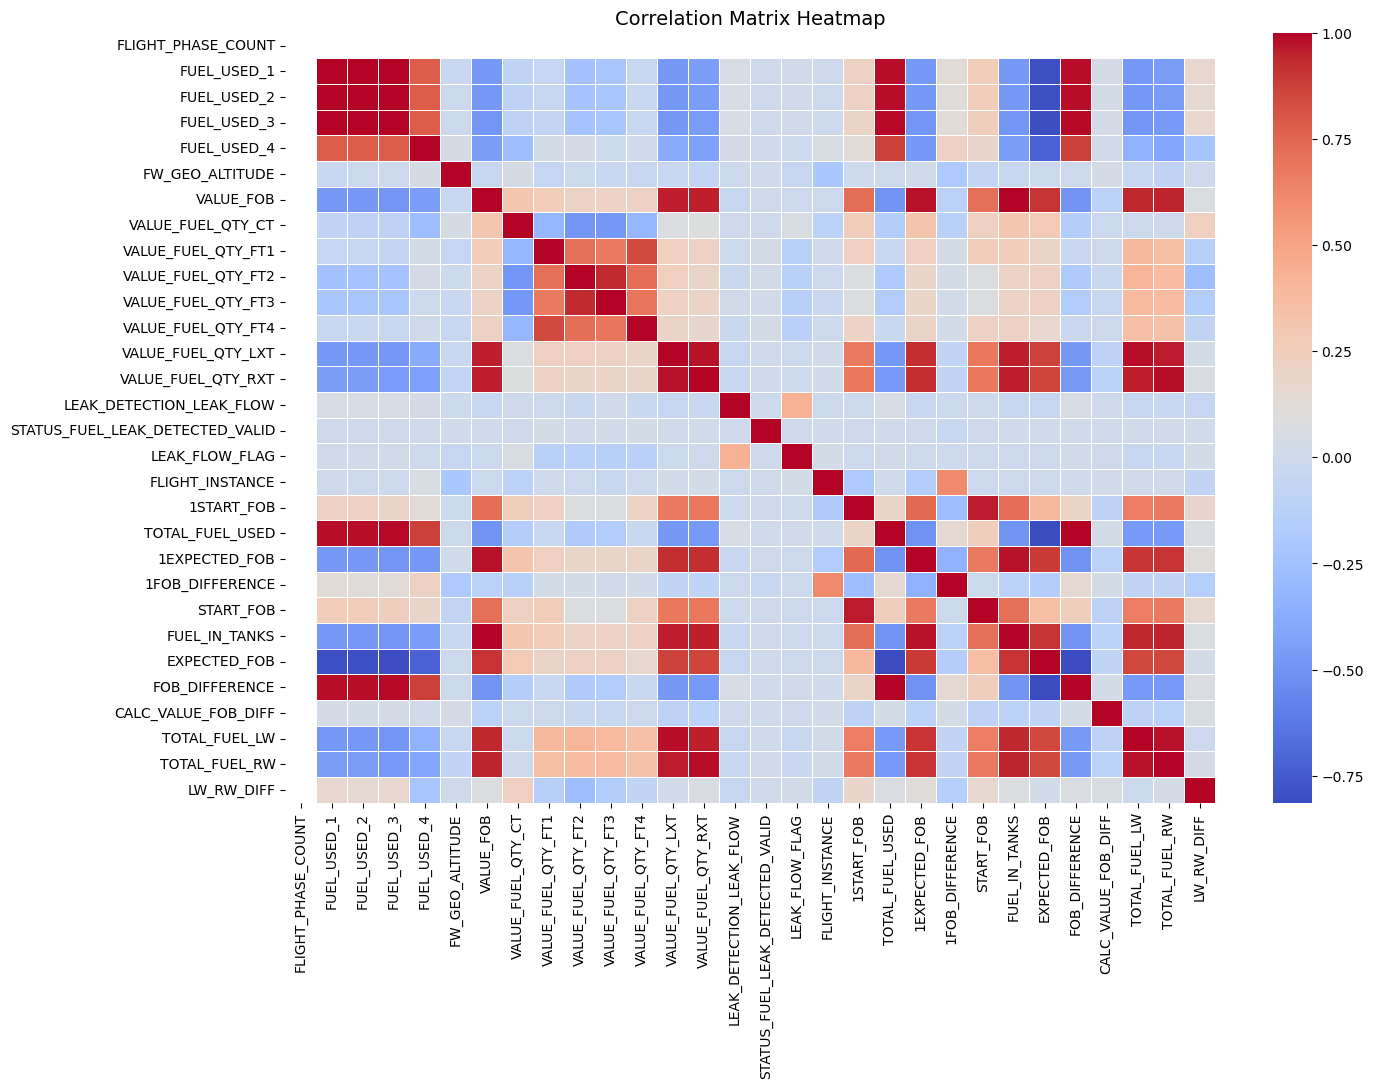

In [408]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

# Title
plt.title("Correlation Matrix Heatmap", fontsize=14)
plt.show()


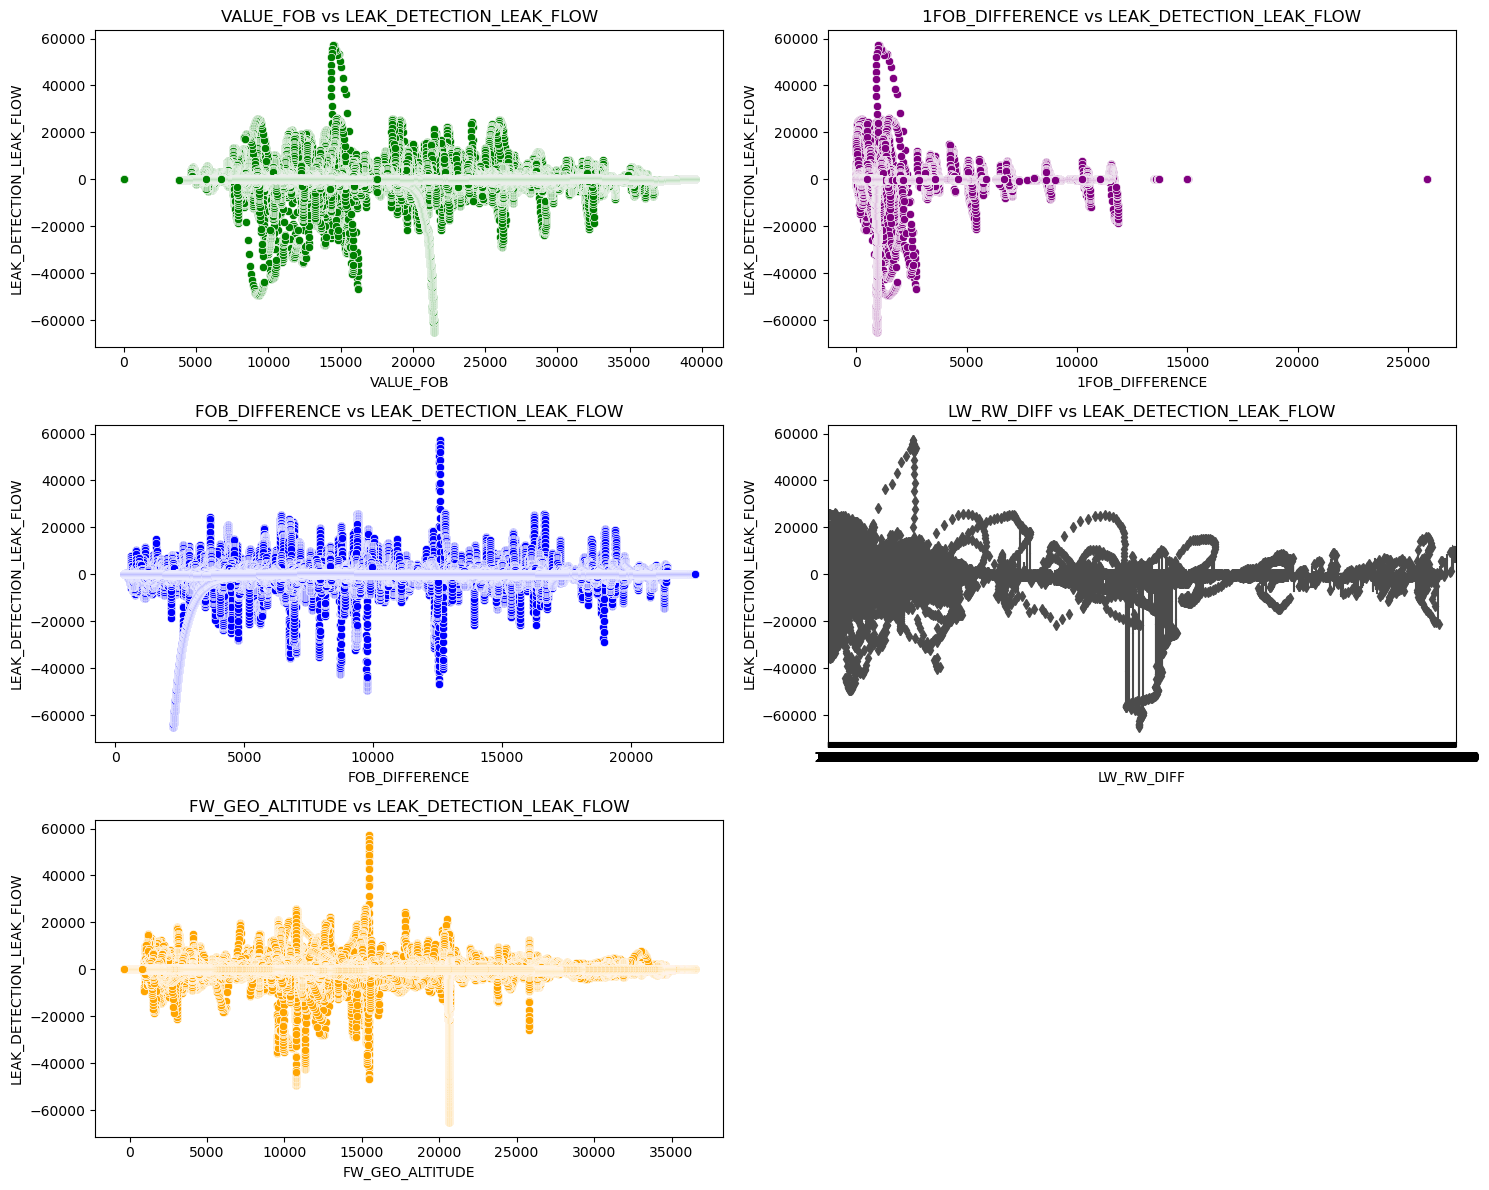

In [409]:
# Plot scatter plots for key predictors against LEAK_DETECTION_LEAK_FLOW
plt.figure(figsize=(15, 12))

# VALUE_FOB vs LEAK_DETECTION_LEAK_FLOW
plt.subplot(3, 2, 1)
sns.scatterplot(x=df['VALUE_FOB'], y=df['LEAK_DETECTION_LEAK_FLOW'], color='green')
plt.title('VALUE_FOB vs LEAK_DETECTION_LEAK_FLOW')
plt.xlabel('VALUE_FOB')
plt.ylabel('LEAK_DETECTION_LEAK_FLOW')

# 1FOB_DIFFERENCE vs LEAK_DETECTION_LEAK_FLOW (1st equation)
plt.subplot(3, 2, 2)
sns.scatterplot(x=df['1FOB_DIFFERENCE'], y=df['LEAK_DETECTION_LEAK_FLOW'], color='purple')
plt.title('1FOB_DIFFERENCE vs LEAK_DETECTION_LEAK_FLOW')
plt.xlabel('1FOB_DIFFERENCE')
plt.ylabel('LEAK_DETECTION_LEAK_FLOW')

# FOB_DIFFERENCE vs LEAK_DETECTION_LEAK_FLOW (equation 2)
plt.subplot(3, 2, 3)
sns.scatterplot(x=df['FOB_DIFFERENCE'], y=df['LEAK_DETECTION_LEAK_FLOW'], color='blue')
plt.title('FOB_DIFFERENCE vs LEAK_DETECTION_LEAK_FLOW')
plt.xlabel('FOB_DIFFERENCE')
plt.ylabel('LEAK_DETECTION_LEAK_FLOW')

# LW_RW_DIFF vs LEAK_DETECTION_LEAK_FLOW
plt.subplot(3, 2, 4)
sns.boxplot(x=df['LW_RW_DIFF'], y=df['LEAK_DETECTION_LEAK_FLOW'], color='red')
plt.title('LW_RW_DIFF vs LEAK_DETECTION_LEAK_FLOW')
plt.xlabel('LW_RW_DIFF')
plt.ylabel('LEAK_DETECTION_LEAK_FLOW')

# FW_GEO_ALTUTUDE vs LEAK_DETECTION_LEAK_FLOW
plt.subplot(3, 2, 5)
sns.scatterplot(x=df['FW_GEO_ALTITUDE'], y=df['LEAK_DETECTION_LEAK_FLOW'], color='orange')
plt.title('FW_GEO_ALTITUDE vs LEAK_DETECTION_LEAK_FLOW')
plt.xlabel('FW_GEO_ALTITUDE')
plt.ylabel('LEAK_DETECTION_LEAK_FLOW')

plt.tight_layout()
plt.show()

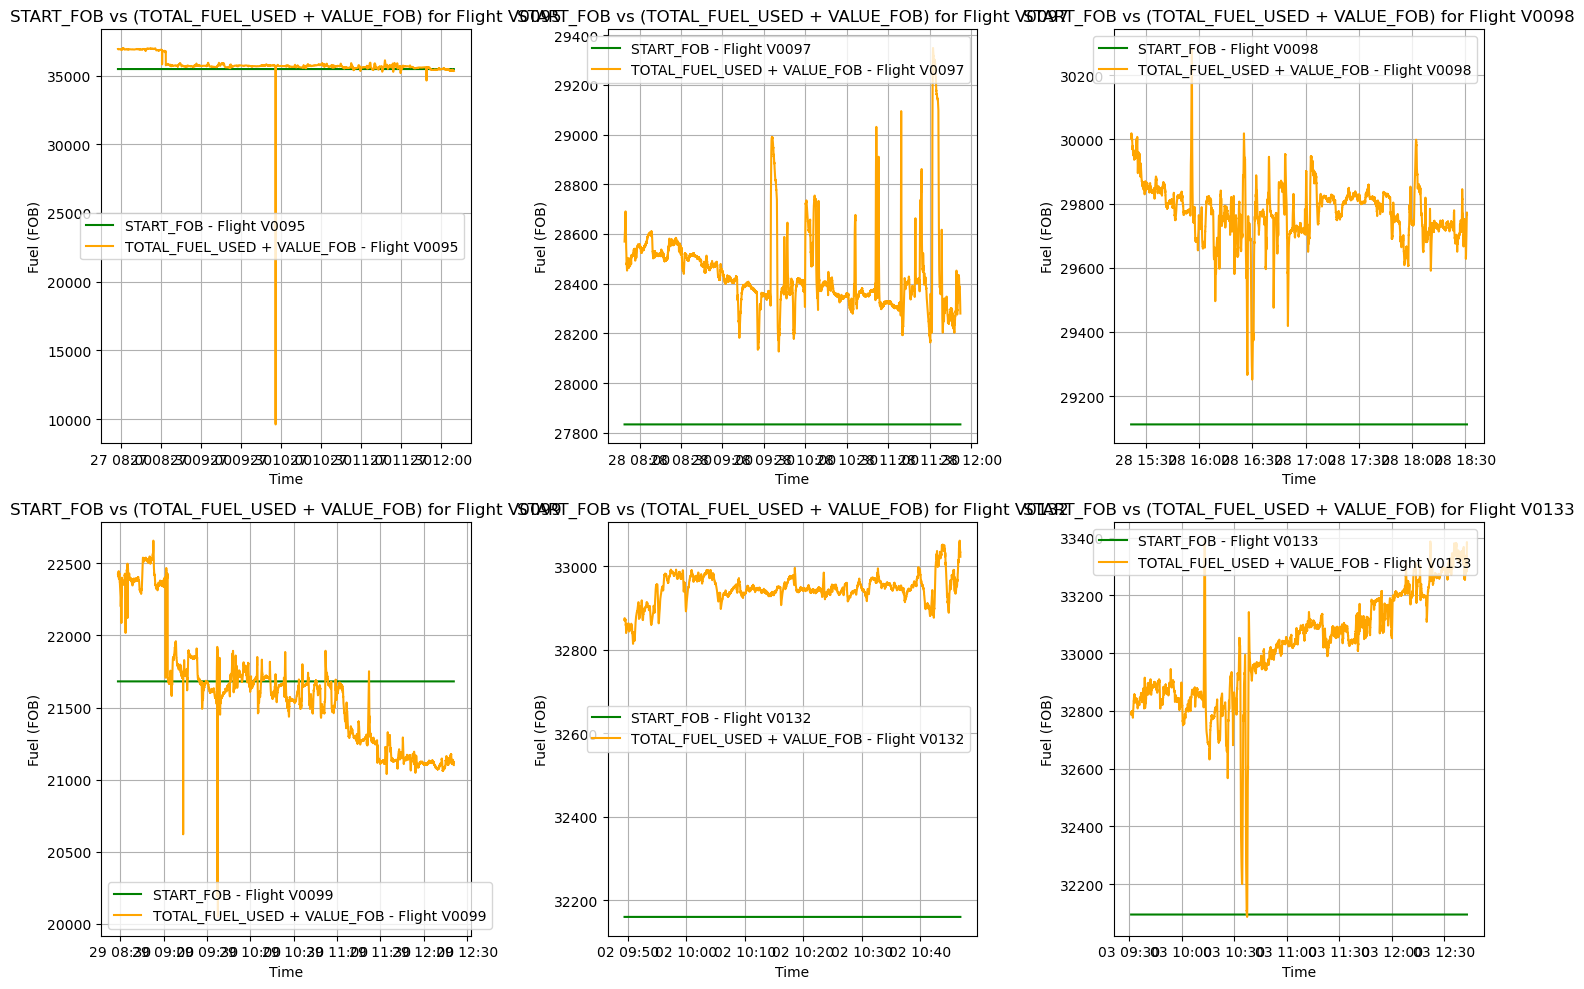

In [410]:
# EQUATION 2
flights_to_plot = df['Flight'].unique()[:7]

# Initialize counter
counter = 0

# Set up the number of rows and columns for subplots
rows = 2 
cols = 3  

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easy iteration (if it's 2D)
axes = axes.flatten()

# For each unique flight
for idx, flight in enumerate(flights_to_plot[1:]):  # Skipping the first flight for the plot
    if counter == 7:
        break

    # Filter data for that flight
    flight_data = df[df['Flight'] == flight]
    
    # Select the current subplot axis
    ax = axes[idx]
    
    # Plot the START_FOB
    ax.plot(flight_data.index, flight_data['START_FOB'], label=f'START_FOB - Flight {flight}', color='green')
    
    # Calculate TOTAL_FUEL_USED + VALUE_FOB for the entire flight
    total_fuel_used_plus_fob = flight_data['TOTAL_FUEL_USED'] + flight_data['VALUE_FOB']
    
    # Plot the TOTAL_FUEL_USED + VALUE_FOB
    ax.plot(flight_data.index, total_fuel_used_plus_fob, label=f'TOTAL_FUEL_USED + VALUE_FOB - Flight {flight}', color='orange')
    
    # Set the title and labels for the subplot
    ax.set_title(f'START_FOB vs (TOTAL_FUEL_USED + VALUE_FOB) for Flight {flight}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Fuel (FOB)')
    
    # Add legend
    ax.legend()
    
    # Show grid
    ax.grid(True)

    # Increment counter
    counter += 1

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 383560 entries, 2010-10-26 13:32:07 to 2017-01-23 20:17:48
Data columns (total 34 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   MSN                              383560 non-null  object 
 1   Flight                           383560 non-null  object 
 2   FLIGHT_PHASE_COUNT               383560 non-null  float64
 3   FUEL_USED_1                      383560 non-null  float64
 4   FUEL_USED_2                      383560 non-null  float64
 5   FUEL_USED_3                      383560 non-null  float64
 6   FUEL_USED_4                      383560 non-null  float64
 7   FW_GEO_ALTITUDE                  383560 non-null  float64
 8   VALUE_FOB                        383560 non-null  float64
 9   VALUE_FUEL_QTY_CT                383560 non-null  float64
 10  VALUE_FUEL_QTY_FT1               383560 non-null  float64
 11  VALUE_FUEL_QTY_FT2             

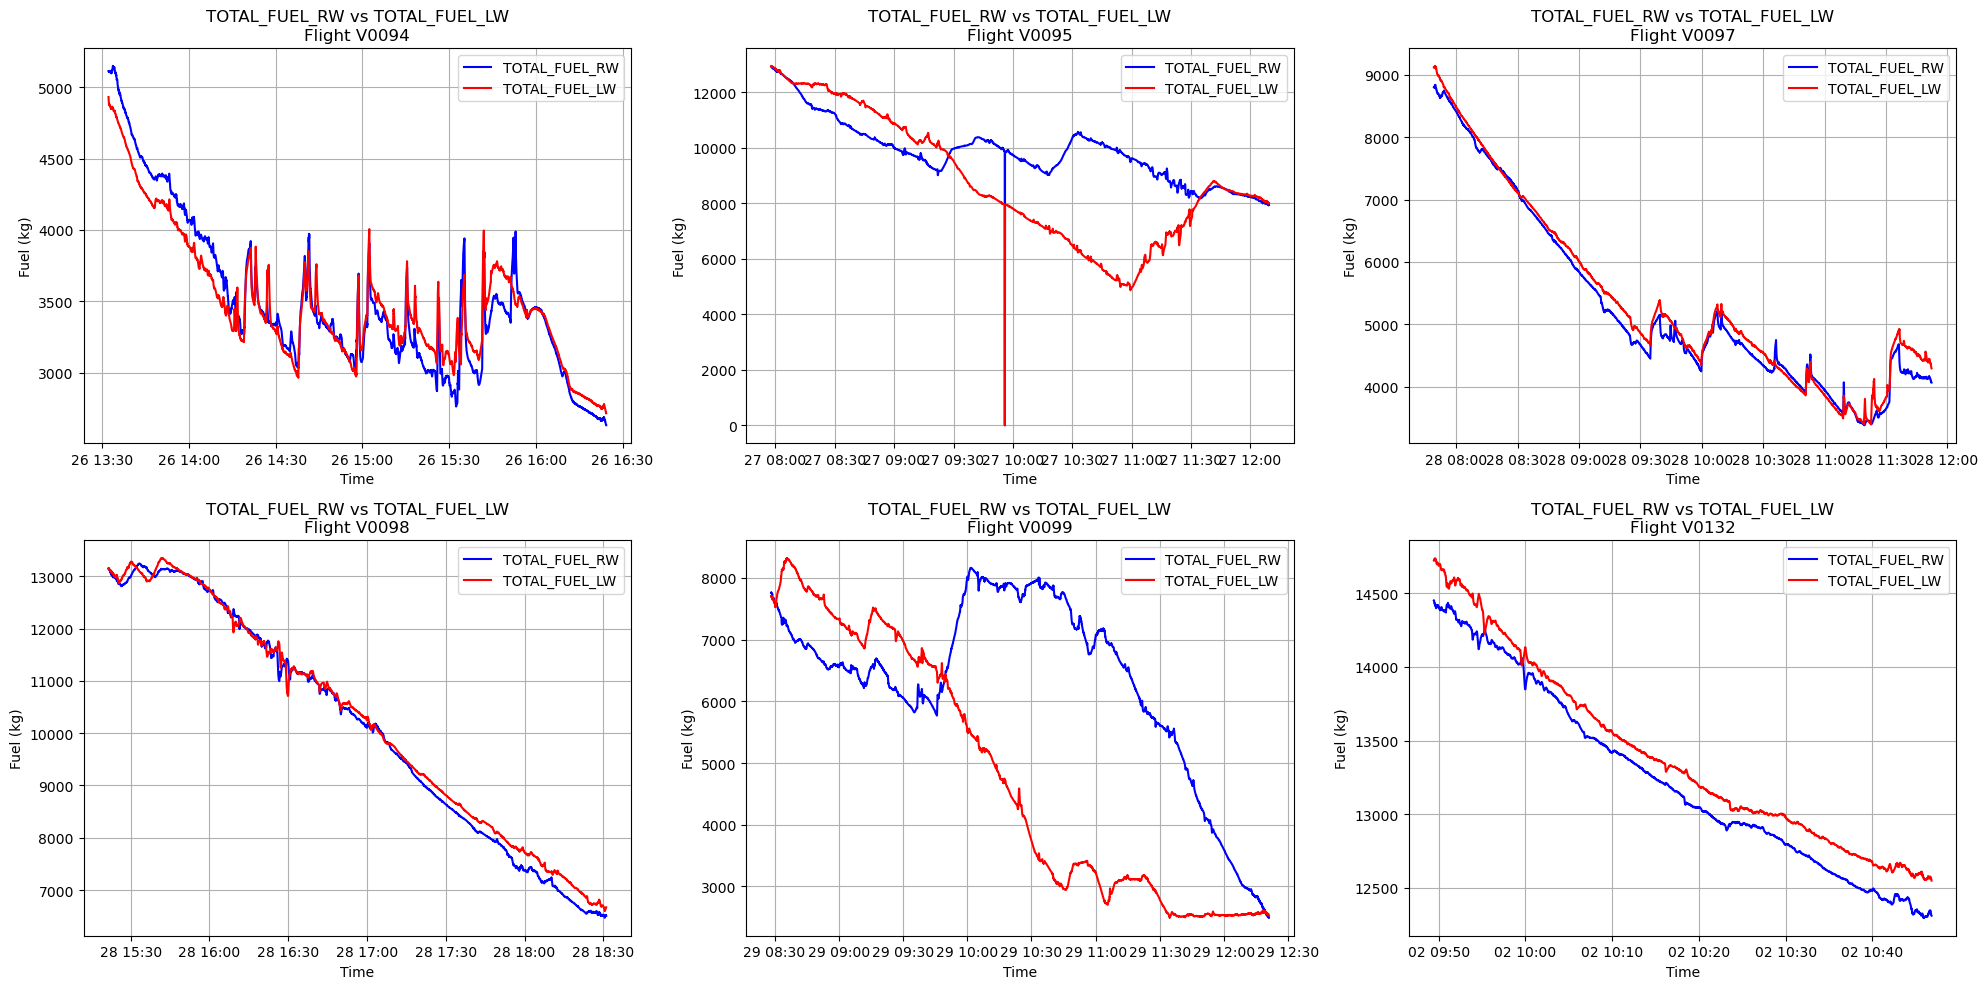

In [412]:
import matplotlib.pyplot as plt

# Select a few flights to plot
flights_to_plot = df['Flight'].unique()[:7]

# Set up subplots layout
rows, cols = 2, 3  
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot data for each flight
for idx, flight in enumerate(flights_to_plot[:6]):  # Limiting to 6 flights for subplot arrangement
    # Filter data for the specific flight
    flight_data = df[df['Flight'] == flight]
    
    # Select the current subplot axis
    ax = axes[idx]
    
    # Plot TOTAL_FUEL_RW vs TOTAL_FUEL_LW
    ax.plot(flight_data.index, flight_data['TOTAL_FUEL_RW'], label='TOTAL_FUEL_RW', color='blue')
    ax.plot(flight_data.index, flight_data['TOTAL_FUEL_LW'], label='TOTAL_FUEL_LW', color='red')

    # Set the title and labels
    ax.set_title(f'TOTAL_FUEL_RW vs TOTAL_FUEL_LW\nFlight {flight}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Fuel (kg)')

    # Add legend and grid
    ax.legend()
    ax.grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 383560 entries, 2010-10-26 13:32:07 to 2017-01-23 20:17:48
Data columns (total 34 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   MSN                              383560 non-null  object 
 1   Flight                           383560 non-null  object 
 2   FLIGHT_PHASE_COUNT               383560 non-null  float64
 3   FUEL_USED_1                      383560 non-null  float64
 4   FUEL_USED_2                      383560 non-null  float64
 5   FUEL_USED_3                      383560 non-null  float64
 6   FUEL_USED_4                      383560 non-null  float64
 7   FW_GEO_ALTITUDE                  383560 non-null  float64
 8   VALUE_FOB                        383560 non-null  float64
 9   VALUE_FUEL_QTY_CT                383560 non-null  float64
 10  VALUE_FUEL_QTY_FT1               383560 non-null  float64
 11  VALUE_FUEL_QTY_FT2             

In [414]:
df['STATUS_FUEL_LEAK_DETECTED_VALID'].value_counts()

STATUS_FUEL_LEAK_DETECTED_VALID
1.0    383551
0.0         9
Name: count, dtype: int64

In [415]:
# Filter flights where STATUS_FUEL_LEAK_DETECTED_VALID is 0
df[df['STATUS_FUEL_LEAK_DETECTED_VALID'] == 0]['Flight']

UTC_TIME
2010-10-27 08:30:56    V0095
2010-10-27 09:55:52    V0095
2010-10-27 09:55:53    V0095
2010-10-27 09:55:54    V0095
2010-10-27 09:55:55    V0095
2010-10-27 09:55:56    V0095
2010-10-27 09:55:57    V0095
2010-10-29 08:30:49    V0099
2010-10-29 09:02:53    V0099
Name: Flight, dtype: object

In [416]:
df[df['STATUS_FUEL_LEAK_DETECTED_VALID'] == 0]['FLIGHT_ID']

UTC_TIME
2010-10-27 08:30:56    V0095_0
2010-10-27 09:55:52    V0095_0
2010-10-27 09:55:53    V0095_0
2010-10-27 09:55:54    V0095_0
2010-10-27 09:55:55    V0095_0
2010-10-27 09:55:56    V0095_0
2010-10-27 09:55:57    V0095_0
2010-10-29 08:30:49    V0099_0
2010-10-29 09:02:53    V0099_0
Name: FLIGHT_ID, dtype: object

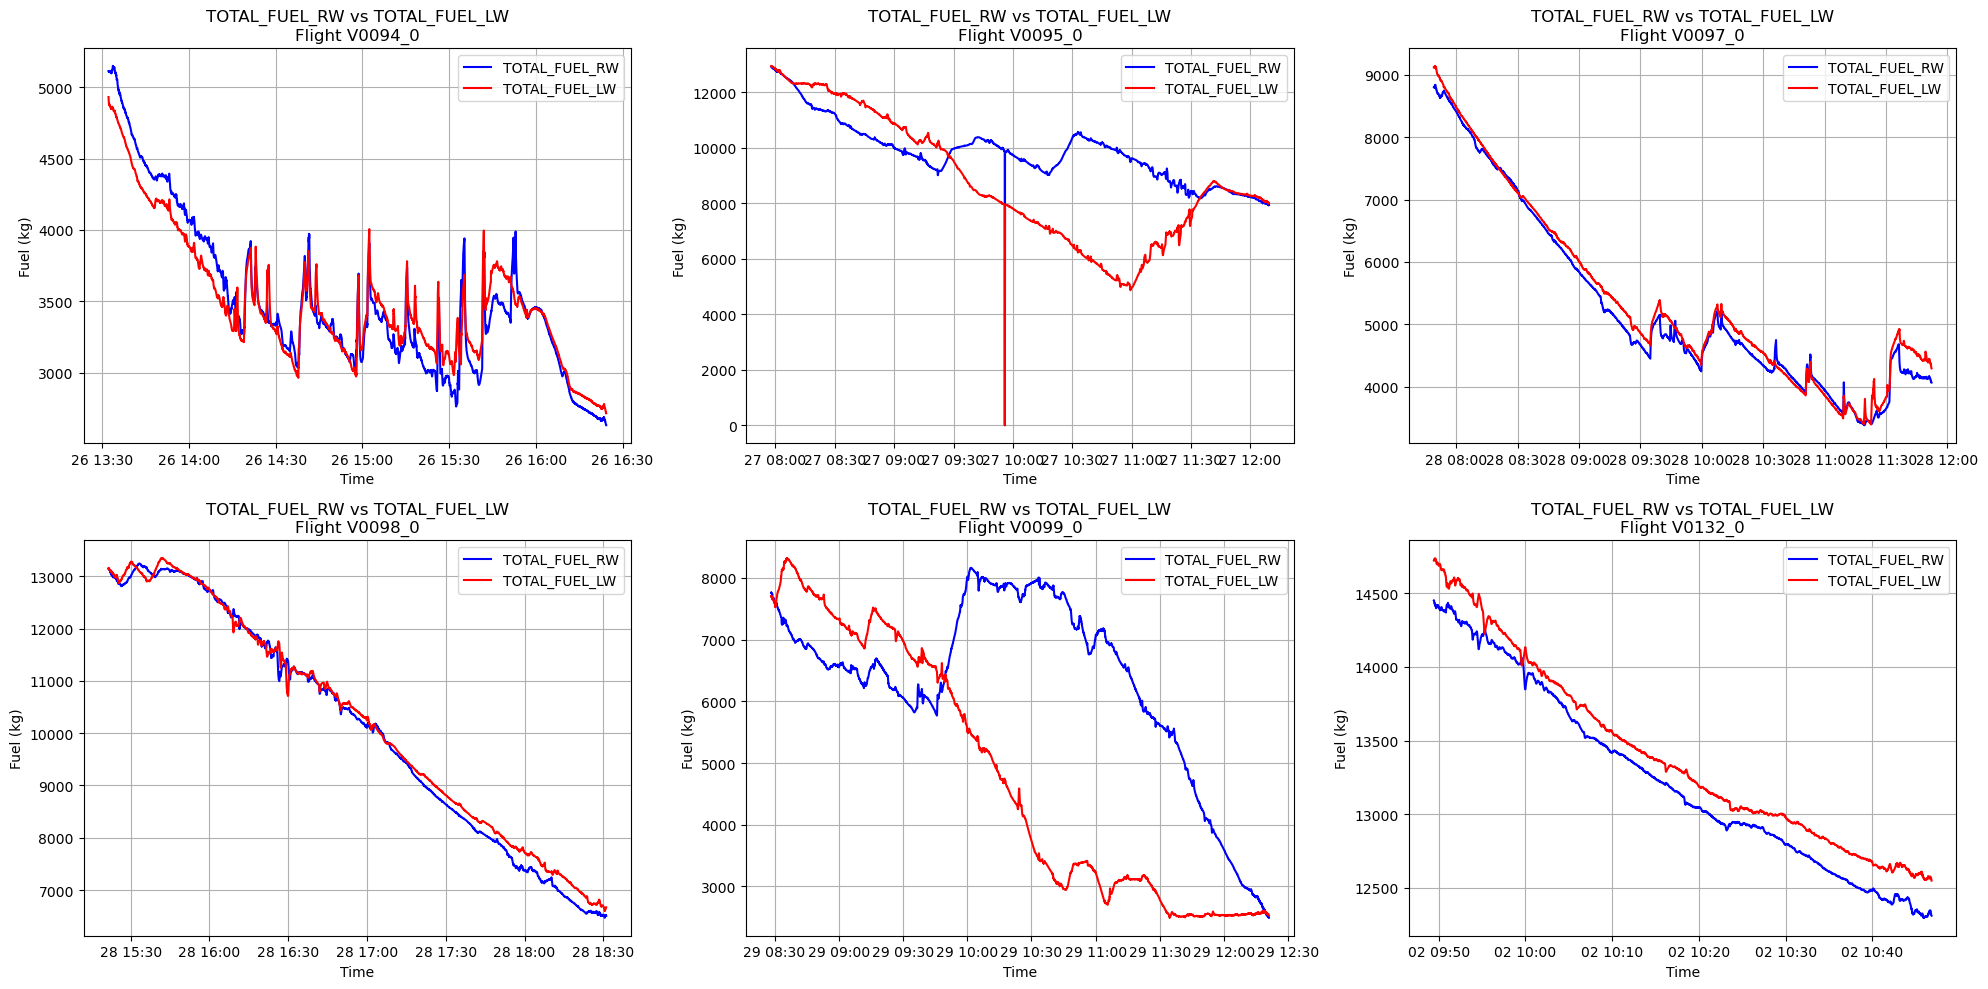

In [417]:
import matplotlib.pyplot as plt

# Select a few flights to plot
flights_to_plot = df['FLIGHT_ID'].unique()[:7]

# Set up subplots layout
rows, cols = 2, 3  
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot data for each flight
for idx, flight in enumerate(flights_to_plot[:6]):  # Limiting to 6 flights for subplot arrangement
    # Filter data for the specific flight
    flight_data = df[df['FLIGHT_ID'] == flight]
    
    # Select the current subplot axis
    ax = axes[idx]
    
    # Plot TOTAL_FUEL_RW vs TOTAL_FUEL_LW
    ax.plot(flight_data.index, flight_data['TOTAL_FUEL_RW'], label='TOTAL_FUEL_RW', color='blue')
    ax.plot(flight_data.index, flight_data['TOTAL_FUEL_LW'], label='TOTAL_FUEL_LW', color='red')

    # Set the title and labels
    ax.set_title(f'TOTAL_FUEL_RW vs TOTAL_FUEL_LW\nFlight {flight}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Fuel (kg)')

    # Add legend and grid
    ax.legend()
    ax.grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


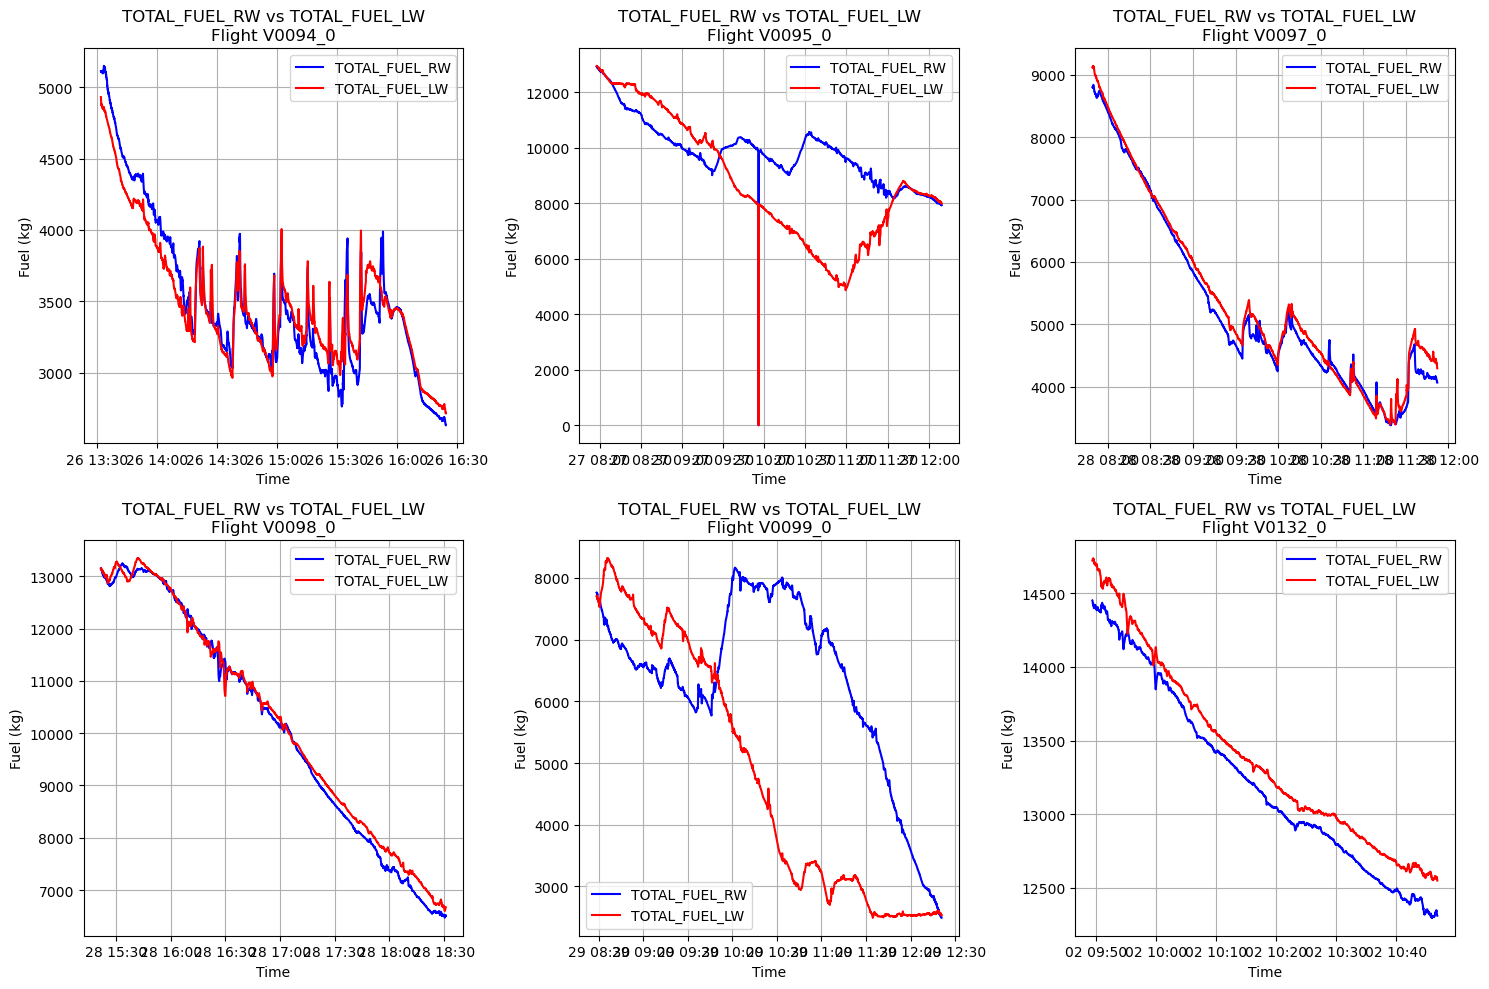

In [418]:
import matplotlib.pyplot as plt

# Select a few flights to plot
flights_to_plot = df['FLIGHT_ID'].unique()[:7]

# Set up subplots layout
rows, cols = 2, 3  
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot data for each flight
for idx, flight in enumerate(flights_to_plot[:6]):  # Limiting to 6 flights for subplot arrangement
    # Filter data for the specific flight
    flight_data = df[df['FLIGHT_ID'] == flight]
    
    # Select the current subplot axis
    ax = axes[idx]
    
    # Plot TOTAL_FUEL_RW vs TOTAL_FUEL_LW
    ax.plot(flight_data.index, flight_data['TOTAL_FUEL_RW'], label='TOTAL_FUEL_RW', color='blue')
    ax.plot(flight_data.index, flight_data['TOTAL_FUEL_LW'], label='TOTAL_FUEL_LW', color='red')

    # Set the title and labels
    ax.set_title(f'TOTAL_FUEL_RW vs TOTAL_FUEL_LW\nFlight {flight}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Fuel (kg)')

    # Add legend and grid
    ax.legend()
    ax.grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [419]:
df['LW_RW_DIFF'].describe()

count    383560.000000
mean        401.334349
std         716.852748
min           0.000000
25%          67.000000
50%         144.000000
75%         412.000000
max        4895.000000
Name: LW_RW_DIFF, dtype: float64

In [420]:
df

,MSN,Flight,FLIGHT_PHASE_COUNT,FUEL_USED_1,FUEL_USED_2,FUEL_USED_3,FUEL_USED_4,FW_GEO_ALTITUDE,VALUE_FOB,VALUE_FUEL_QTY_CT,...,1EXPECTED_FOB,1FOB_DIFFERENCE,START_FOB,FUEL_IN_TANKS,EXPECTED_FOB,FOB_DIFFERENCE,CALC_VALUE_FOB_DIFF,TOTAL_FUEL_LW,TOTAL_FUEL_RW,LW_RW_DIFF
UTC_TIME,,,,,,,,,,,,,,,,,,,,,
2010-10-26 13:32:07,A400M-0002,V0094,8.0,181.2604,171.6588,169.3020,165.2579,1862.5000,17603.0,7563.0,...,16915.5209,687.4791,17603.0,17607.0,16919.5209,683.4791,4.0,4931.0,5113.0,182.0
2010-10-26 13:32:08,A400M-0002,V0094,8.0,181.8168,172.1500,169.7946,165.8102,1902.0000,17604.0,7570.0,...,16913.4284,690.5716,17603.0,17606.0,16916.4284,687.5716,2.0,4927.0,5109.0,182.0
2010-10-26 13:32:09,A400M-0002,V0094,8.0,182.3093,172.7015,170.3493,166.3014,1942.7500,17595.0,7573.0,...,16911.3385,683.6615,17603.0,17599.0,16907.3385,687.6615,4.0,4917.0,5109.0,192.0
2010-10-26 13:32:10,A400M-0002,V0094,8.0,182.8035,173.1928,170.9017,166.7918,1982.3750,17594.0,7578.0,...,16909.3102,684.6898,17603.0,17597.0,16903.3102,690.6898,3.0,4911.0,5108.0,197.0
2010-10-26 13:32:11,A400M-0002,V0094,8.0,183.2964,173.6837,171.3953,167.2789,2018.8750,17599.0,7586.0,...,16907.3457,691.6543,17603.0,17601.0,16905.3457,693.6543,2.0,4906.0,5109.0,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-23 20:17:44,A400M-0002,V0966,8.0,5640.2620,5591.3880,5567.9140,5674.5750,879.3431,17485.0,0.0,...,16986.8610,498.1390,39461.0,17484.0,-4990.1390,22475.1390,-1.0,8939.0,8545.0,394.0
2017-01-23 20:17:45,A400M-0002,V0966,8.0,5640.5340,5591.6560,5568.1830,5674.8500,866.8090,17486.0,0.0,...,16985.7770,500.2230,39461.0,17483.0,-4992.2230,22478.2230,-3.0,8938.0,8545.0,393.0
2017-01-23 20:17:46,A400M-0002,V0966,8.0,5640.8070,5591.9230,5568.4780,5675.1230,852.8960,17484.0,0.0,...,16984.6690,499.3310,39461.0,17482.0,-4994.3310,22478.3310,-2.0,8938.0,8544.0,394.0
